In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
# Importing data
dataset = pd.read_excel(r'D:\NSP ML\ML FINAL FILES\POST-ML-TESTING.xlsx')
d1 = pd.get_dummies(dataset)

In [187]:
d1['FK_FLAG'].value_counts()

0    225
1     35
Name: FK_FLAG, dtype: int64

In [188]:
print('Percentage of data where class = 1 is : ',(len(dataset[dataset['FK_FLAG'] == 1])/ len(dataset[dataset['FK_FLAG'] == 0]))*100)

Percentage of data where class = 1 is :  15.555555555555555


In [189]:
X = d1.drop(columns=['FK_FLAG','c_institution_id','PREPOST_POST','CountOfIp Address'])
Y = d1.iloc[:, 28]

In [190]:
X.shape

(260, 32)

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [192]:
print(f'Shape of X_train :{X_train.shape}')
print(f'Shape of X_test :{X_test.shape}')
print(f'Shape of y_train :{y_train.shape}')
print(f'Shape of y_test :{y_test.shape}')

Shape of X_train :(182, 32)
Shape of X_test :(78, 32)
Shape of y_train :(182,)
Shape of y_test :(78,)


In [226]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [229]:
X_train.shape

(182, 32)

In [231]:
train_scores = []
test_scores = []
values = [i for i in range(1, 31)]
for i in values:
	# configure the model
	model = RandomForestClassifier(max_depth=i, random_state=0)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score( y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	#print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

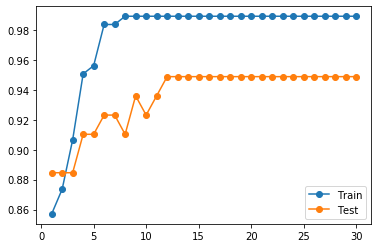

In [232]:
from matplotlib import pyplot
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [240]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,roc_auc_score,roc_curve
random_forest = RandomForestClassifier(max_depth=15, random_state=0)
random_forest.fit(X_train, y_train)


random_forest_pred = random_forest.predict(X_test)
#accuracy_score(random_forest_pred,y_test)
cm1 = confusion_matrix( y_test,random_forest_pred)
print('Random Forest Classifier\n',cm1)

Random Forest Classifier
 [[69  0]
 [ 4  5]]


In [241]:
x = pd.read_csv(r'D:\NSP ML\ML FINAL FILES\POSTMATRIC-MODEL.csv')
X_T = x.drop(columns=['c_institution_id','PRE POST','CountOfIp Address'])

In [242]:
x.shape

(74454, 30)

In [243]:
X_T.isnull().sum()

max_application_level           12398
min_application_level           12398
avg_application_level           12398
median_as_application_level     12398
max_annual_family_income            0
min_annual_family_income            0
avg_annual_family_income            0
median_annual_family_income         0
count_of_application_id             0
count_of_in_rank                    0
Percent_Inrank                      0
sunday                          36239
average_of_verification_time    12408
ZERO                            72176
MaxOfAc Year                    72176
average_scholarship_amount      14971
R1                                  0
R2                                  0
R3                                  0
R4                                  0
R5                                  0
R6                                  0
R7                                  0
R8                                  0
M                                   0
F                                   0
T           

In [244]:
X_T.fillna(0, inplace=True)

In [245]:
X_T = pd.get_dummies(X_T)
X_T.shape

(74454, 32)

In [246]:
X_T_pred = random_forest.predict(X_T)
X_T['Pred FK_FLAG'] = X_T_pred
X_T['c_institution_id'] = x['c_institution_id']

In [248]:
X_T['Pred FK_FLAG'].value_counts()

0    74377
1       77
Name: Pred FK_FLAG, dtype: int64

In [249]:
X_T.to_csv('D:/NSP ML/Post_Test_final.csv',index=False)

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [208]:
classifier = Sequential()

In [211]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    Dropout(0.5)
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [1, 5],
           'epochs': [100, 120],
           'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                        param_grid = parameters,
                        scoring = 'accuracy',
                        cv = 10)
grid_search = grid_search.fit(X_train, y_train)


Epoch 1/100
156/156 [==============================] - 0s 877us/step - loss: 0.5677 - accuracy: 0.8897
Epoch 2/100
156/156 [==============================] - 0s 884us/step - loss: 0.3812 - accuracy: 0.9036
Epoch 3/100
156/156 [==============================] - 0s 884us/step - loss: 0.5333 - accuracy: 0.9052
Epoch 4/100
156/156 [==============================] - 0s 865us/step - loss: 0.4494 - accuracy: 0.8900
Epoch 5/100
156/156 [==============================] - 0s 924us/step - loss: 0.4346 - accuracy: 0.8756
Epoch 6/100
156/156 [==============================] - 0s 908us/step - loss: 0.3264 - accuracy: 0.9130
Epoch 7/100
156/156 [==============================] - 0s 891us/step - loss: 0.3782 - accuracy: 0.9058
Epoch 8/100
156/156 [==============================] - 0s 878us/step - loss: 0.4434 - accuracy: 0.8412
Epoch 9/100
156/156 [==============================] - 0s 933us/step - loss: 0.3890 - accuracy: 0.8675
Epoch 10/100
156/156 [==============================] - 0s 852us/step - l

156/156 [==============================] - 0s 834us/step - loss: 0.2854 - accuracy: 0.8780
Epoch 80/100
156/156 [==============================] - 0s 796us/step - loss: 0.2458 - accuracy: 0.9194
Epoch 81/100
156/156 [==============================] - 0s 828us/step - loss: 0.3457 - accuracy: 0.8758
Epoch 82/100
156/156 [==============================] - 0s 814us/step - loss: 0.2275 - accuracy: 0.8949
Epoch 83/100
156/156 [==============================] - 0s 791us/step - loss: 0.2644 - accuracy: 0.9061
Epoch 84/100
156/156 [==============================] - 0s 785us/step - loss: 0.2649 - accuracy: 0.8840
Epoch 85/100
156/156 [==============================] - 0s 816us/step - loss: 0.2396 - accuracy: 0.9253
Epoch 86/100
156/156 [==============================] - 0s 804us/step - loss: 0.2586 - accuracy: 0.9149
Epoch 87/100
156/156 [==============================] - 0s 797us/step - loss: 0.3280 - accuracy: 0.8781
Epoch 88/100
156/156 [==============================] - 0s 811us/step - loss:

D:\anac\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


156/156 [==============================] - 0s 870us/step - loss: 0.9312 - accuracy: 0.8603
Epoch 2/100
156/156 [==============================] - 0s 868us/step - loss: 0.4558 - accuracy: 0.8900
Epoch 3/100
156/156 [==============================] - 0s 851us/step - loss: 0.4737 - accuracy: 0.8576
Epoch 4/100
156/156 [==============================] - 0s 852us/step - loss: 0.4864 - accuracy: 0.8817
Epoch 5/100
156/156 [==============================] - 0s 822us/step - loss: 0.4461 - accuracy: 0.8668
Epoch 6/100
156/156 [==============================] - 0s 873us/step - loss: 0.4550 - accuracy: 0.8350
Epoch 7/100
156/156 [==============================] - 0s 862us/step - loss: 0.4530 - accuracy: 0.8843
Epoch 8/100
156/156 [==============================] - 0s 890us/step - loss: 0.4306 - accuracy: 0.8468
Epoch 9/100
156/156 [==============================] - 0s 871us/step - loss: 0.4643 - accuracy: 0.8453
Epoch 10/100
156/156 [==============================] - 0s 880us/step - loss: 0.4668 

Epoch 80/100
156/156 [==============================] - 0s 859us/step - loss: 0.3662 - accuracy: 0.8451
Epoch 81/100
156/156 [==============================] - 0s 852us/step - loss: 0.4538 - accuracy: 0.7861
Epoch 82/100
156/156 [==============================] - 0s 845us/step - loss: 0.2935 - accuracy: 0.8948
Epoch 83/100
156/156 [==============================] - 0s 826us/step - loss: 0.3049 - accuracy: 0.8984
Epoch 84/100
156/156 [==============================] - 0s 821us/step - loss: 0.3513 - accuracy: 0.8382
Epoch 85/100
156/156 [==============================] - 0s 848us/step - loss: 0.4411 - accuracy: 0.8236
Epoch 86/100
156/156 [==============================] - 0s 849us/step - loss: 0.3946 - accuracy: 0.8661
Epoch 87/100
156/156 [==============================] - 0s 840us/step - loss: 0.3135 - accuracy: 0.8932
Epoch 88/100
156/156 [==============================] - 0s 820us/step - loss: 0.3662 - accuracy: 0.8680
Epoch 89/100
156/156 [==============================] - 0s 855us

156/156 [==============================] - 0s 815us/step - loss: 0.3752 - accuracy: 0.8487
Epoch 59/100
156/156 [==============================] - 0s 962us/step - loss: 0.4186 - accuracy: 0.8227
Epoch 60/100
156/156 [==============================] - 0s 794us/step - loss: 0.3591 - accuracy: 0.8582
Epoch 61/100
156/156 [==============================] - 0s 838us/step - loss: 0.4106 - accuracy: 0.8224
Epoch 62/100
156/156 [==============================] - 0s 913us/step - loss: 0.3427 - accuracy: 0.8776
Epoch 63/100
156/156 [==============================] - 0s 887us/step - loss: 0.3252 - accuracy: 0.9072
Epoch 64/100
156/156 [==============================] - 0s 676us/step - loss: 0.3666 - accuracy: 0.8574
Epoch 65/100
156/156 [==============================] - 0s 741us/step - loss: 0.3434 - accuracy: 0.8739
Epoch 66/100
156/156 [==============================] - 0s 775us/step - loss: 0.3337 - accuracy: 0.8879
Epoch 67/100
156/156 [==============================] - 0s 791us/step - loss:

Epoch 37/100
156/156 [==============================] - 0s 872us/step - loss: 0.4359 - accuracy: 0.8541
Epoch 38/100
156/156 [==============================] - 0s 843us/step - loss: 0.3316 - accuracy: 0.8898
Epoch 39/100
156/156 [==============================] - 0s 820us/step - loss: 0.3758 - accuracy: 0.8448
Epoch 40/100
156/156 [==============================] - 0s 767us/step - loss: 0.3118 - accuracy: 0.8642
Epoch 41/100
156/156 [==============================] - 0s 769us/step - loss: 0.2980 - accuracy: 0.8829
Epoch 42/100
156/156 [==============================] - 0s 785us/step - loss: 0.3073 - accuracy: 0.8659
Epoch 43/100
156/156 [==============================] - 0s 789us/step - loss: 0.3524 - accuracy: 0.8943
Epoch 44/100
156/156 [==============================] - 0s 787us/step - loss: 0.2716 - accuracy: 0.8842
Epoch 45/100
156/156 [==============================] - 0s 747us/step - loss: 0.3783 - accuracy: 0.8401
Epoch 46/100
156/156 [==============================] - 0s 770us

157/157 [==============================] - 0s 869us/step - loss: 0.4501 - accuracy: 0.8079
Epoch 16/100
157/157 [==============================] - 0s 857us/step - loss: 0.3316 - accuracy: 0.9009
Epoch 17/100
157/157 [==============================] - 0s 827us/step - loss: 0.4154 - accuracy: 0.8507
Epoch 18/100
157/157 [==============================] - 0s 840us/step - loss: 0.5605 - accuracy: 0.8268
Epoch 19/100
157/157 [==============================] - 0s 786us/step - loss: 0.3672 - accuracy: 0.85990s - loss: 0.3616 - accuracy: 0.85
Epoch 20/100
157/157 [==============================] - 0s 752us/step - loss: 0.5420 - accuracy: 0.8338
Epoch 21/100
157/157 [==============================] - 0s 755us/step - loss: 0.3905 - accuracy: 0.8700
Epoch 22/100
157/157 [==============================] - 0s 741us/step - loss: 0.4683 - accuracy: 0.8208
Epoch 23/100
157/157 [==============================] - 0s 748us/step - loss: 0.3613 - accuracy: 0.8464
Epoch 24/100
157/157 [=====================

157/157 [==============================] - 0s 789us/step - loss: 0.3294 - accuracy: 0.9060
Epoch 94/100
157/157 [==============================] - 0s 889us/step - loss: 0.3517 - accuracy: 0.8740
Epoch 95/100
157/157 [==============================] - 0s 889us/step - loss: 0.2959 - accuracy: 0.8797
Epoch 96/100
157/157 [==============================] - 0s 795us/step - loss: 0.3349 - accuracy: 0.8663
Epoch 97/100
157/157 [==============================] - 0s 801us/step - loss: 0.2333 - accuracy: 0.9354
Epoch 98/100
157/157 [==============================] - 0s 783us/step - loss: 0.2912 - accuracy: 0.8973
Epoch 99/100
157/157 [==============================] - 0s 776us/step - loss: 0.3825 - accuracy: 0.8258
Epoch 100/100
157/157 [==============================] - 0s 810us/step - loss: 0.3493 - accuracy: 0.8604
Epoch 1/100
157/157 [==============================] - 1s 814us/step - loss: 0.6036 - accuracy: 0.8613
Epoch 2/100
157/157 [==============================] - 0s 864us/step - loss: 

Epoch 72/100
157/157 [==============================] - 0s 840us/step - loss: 0.2830 - accuracy: 0.9036
Epoch 73/100
157/157 [==============================] - 0s 760us/step - loss: 0.3111 - accuracy: 0.8966
Epoch 74/100
157/157 [==============================] - 0s 793us/step - loss: 0.3401 - accuracy: 0.8713
Epoch 75/100
157/157 [==============================] - 0s 828us/step - loss: 0.3446 - accuracy: 0.8689
Epoch 76/100
157/157 [==============================] - 0s 773us/step - loss: 0.3004 - accuracy: 0.9085
Epoch 77/100
157/157 [==============================] - 0s 772us/step - loss: 0.3857 - accuracy: 0.8446
Epoch 78/100
157/157 [==============================] - 0s 767us/step - loss: 0.3970 - accuracy: 0.8519
Epoch 79/100
157/157 [==============================] - 0s 778us/step - loss: 0.3408 - accuracy: 0.8680
Epoch 80/100
157/157 [==============================] - 0s 796us/step - loss: 0.3418 - accuracy: 0.8672
Epoch 81/100
157/157 [==============================] - 0s 789us

157/157 [==============================] - 0s 767us/step - loss: 0.3710 - accuracy: 0.8800
Epoch 51/100
157/157 [==============================] - 0s 792us/step - loss: 0.3621 - accuracy: 0.8921
Epoch 52/100
157/157 [==============================] - 0s 776us/step - loss: 0.3907 - accuracy: 0.8470
Epoch 53/100
157/157 [==============================] - 0s 915us/step - loss: 0.3278 - accuracy: 0.8897
Epoch 54/100
157/157 [==============================] - 0s 846us/step - loss: 0.3403 - accuracy: 0.8928
Epoch 55/100
157/157 [==============================] - 0s 812us/step - loss: 0.3187 - accuracy: 0.8911
Epoch 56/100
157/157 [==============================] - 0s 788us/step - loss: 0.3721 - accuracy: 0.8714
Epoch 57/100
157/157 [==============================] - 0s 770us/step - loss: 0.4024 - accuracy: 0.8448
Epoch 58/100
157/157 [==============================] - 0s 753us/step - loss: 0.3279 - accuracy: 0.8780
Epoch 59/100
157/157 [==============================] - 0s 769us/step - loss:

Epoch 29/100
157/157 [==============================] - 0s 779us/step - loss: 0.4194 - accuracy: 0.8417
Epoch 30/100
157/157 [==============================] - 0s 776us/step - loss: 0.3362 - accuracy: 0.8940
Epoch 31/100
157/157 [==============================] - 0s 783us/step - loss: 0.3787 - accuracy: 0.8499
Epoch 32/100
157/157 [==============================] - 0s 820us/step - loss: 0.4000 - accuracy: 0.8726
Epoch 33/100
157/157 [==============================] - 0s 830us/step - loss: 0.3290 - accuracy: 0.8802
Epoch 34/100
157/157 [==============================] - 0s 790us/step - loss: 0.4440 - accuracy: 0.8456
Epoch 35/100
157/157 [==============================] - 0s 786us/step - loss: 0.3847 - accuracy: 0.8329
Epoch 36/100
157/157 [==============================] - 0s 791us/step - loss: 0.3617 - accuracy: 0.8948
Epoch 37/100
157/157 [==============================] - 0s 783us/step - loss: 0.5085 - accuracy: 0.7825
Epoch 38/100
157/157 [==============================] - 0s 777us

157/157 [==============================] - 0s 857us/step - loss: 0.4525 - accuracy: 0.8554
Epoch 8/100
157/157 [==============================] - 0s 856us/step - loss: 0.4178 - accuracy: 0.8870
Epoch 9/100
157/157 [==============================] - 0s 860us/step - loss: 0.4298 - accuracy: 0.8607
Epoch 10/100
157/157 [==============================] - 0s 827us/step - loss: 0.3469 - accuracy: 0.8844
Epoch 11/100
157/157 [==============================] - 0s 857us/step - loss: 0.4349 - accuracy: 0.8563
Epoch 12/100
157/157 [==============================] - 0s 832us/step - loss: 0.3659 - accuracy: 0.8761
Epoch 13/100
157/157 [==============================] - 0s 839us/step - loss: 0.3951 - accuracy: 0.8838
Epoch 14/100
157/157 [==============================] - 0s 827us/step - loss: 0.3468 - accuracy: 0.9090
Epoch 15/100
157/157 [==============================] - 0s 855us/step - loss: 0.4332 - accuracy: 0.8574
Epoch 16/100
157/157 [==============================] - 0s 826us/step - loss: 0

157/157 [==============================] - 0s 939us/step - loss: 0.2950 - accuracy: 0.8956
Epoch 86/100
157/157 [==============================] - 0s 879us/step - loss: 0.3164 - accuracy: 0.8971
Epoch 87/100
157/157 [==============================] - 0s 843us/step - loss: 0.2852 - accuracy: 0.9073
Epoch 88/100
157/157 [==============================] - 0s 854us/step - loss: 0.3819 - accuracy: 0.8422
Epoch 89/100
157/157 [==============================] - 0s 861us/step - loss: 0.2852 - accuracy: 0.8940
Epoch 90/100
157/157 [==============================] - 0s 855us/step - loss: 0.3540 - accuracy: 0.8609
Epoch 91/100
157/157 [==============================] - 0s 894us/step - loss: 0.3170 - accuracy: 0.8893
Epoch 92/100
157/157 [==============================] - 0s 879us/step - loss: 0.3606 - accuracy: 0.8632
Epoch 93/100
157/157 [==============================] - 0s 819us/step - loss: 0.2968 - accuracy: 0.8887
Epoch 94/100
157/157 [==============================] - 0s 860us/step - loss:

Epoch 64/100
157/157 [==============================] - 0s 771us/step - loss: 0.3317 - accuracy: 0.8728
Epoch 65/100
157/157 [==============================] - 0s 766us/step - loss: 0.3564 - accuracy: 0.8818
Epoch 66/100
157/157 [==============================] - 0s 782us/step - loss: 0.3741 - accuracy: 0.8612
Epoch 67/100
157/157 [==============================] - 0s 789us/step - loss: 0.4580 - accuracy: 0.8140
Epoch 68/100
157/157 [==============================] - 0s 768us/step - loss: 0.2964 - accuracy: 0.9019
Epoch 69/100
157/157 [==============================] - 0s 770us/step - loss: 0.3056 - accuracy: 0.9012
Epoch 70/100
157/157 [==============================] - 0s 762us/step - loss: 0.3924 - accuracy: 0.8629
Epoch 71/100
157/157 [==============================] - 0s 775us/step - loss: 0.3154 - accuracy: 0.8998
Epoch 72/100
157/157 [==============================] - 0s 791us/step - loss: 0.3874 - accuracy: 0.8485
Epoch 73/100
157/157 [==============================] - 0s 781us

156/156 [==============================] - 0s 838us/step - loss: 0.3829 - accuracy: 0.8628
Epoch 43/100
156/156 [==============================] - 0s 840us/step - loss: 0.2874 - accuracy: 0.8982
Epoch 44/100
156/156 [==============================] - 0s 826us/step - loss: 0.3327 - accuracy: 0.9049
Epoch 45/100
156/156 [==============================] - 0s 828us/step - loss: 0.4385 - accuracy: 0.8761
Epoch 46/100
156/156 [==============================] - 0s 826us/step - loss: 0.3999 - accuracy: 0.8548
Epoch 47/100
156/156 [==============================] - 0s 824us/step - loss: 0.3417 - accuracy: 0.8913
Epoch 48/100
156/156 [==============================] - 0s 850us/step - loss: 0.4340 - accuracy: 0.9039
Epoch 49/100
156/156 [==============================] - 0s 806us/step - loss: 0.4315 - accuracy: 0.8995
Epoch 50/100
156/156 [==============================] - 0s 814us/step - loss: 0.4352 - accuracy: 0.8341
Epoch 51/100
156/156 [==============================] - 0s 796us/step - loss:

Epoch 21/100
156/156 [==============================] - 0s 824us/step - loss: 0.6454 - accuracy: 0.8285
Epoch 22/100
156/156 [==============================] - 0s 814us/step - loss: 0.5780 - accuracy: 0.8778
Epoch 23/100
156/156 [==============================] - 0s 821us/step - loss: 0.5774 - accuracy: 0.8685
Epoch 24/100
156/156 [==============================] - 0s 809us/step - loss: 0.4905 - accuracy: 0.8714
Epoch 25/100
156/156 [==============================] - 0s 801us/step - loss: 0.5453 - accuracy: 0.8265
Epoch 26/100
156/156 [==============================] - 0s 816us/step - loss: 0.5679 - accuracy: 0.8594
Epoch 27/100
156/156 [==============================] - 0s 810us/step - loss: 0.4519 - accuracy: 0.8637
Epoch 28/100
156/156 [==============================] - 0s 844us/step - loss: 0.3952 - accuracy: 0.9256
Epoch 29/100
156/156 [==============================] - 0s 829us/step - loss: 0.4376 - accuracy: 0.8738
Epoch 30/100
156/156 [==============================] - 0s 802us

156/156 [==============================] - 0s 813us/step - loss: 0.4318 - accuracy: 0.8649
Epoch 100/100
156/156 [==============================] - 0s 806us/step - loss: 0.4852 - accuracy: 0.8641
Epoch 1/100
156/156 [==============================] - 1s 758us/step - loss: 0.6751 - accuracy: 0.8147
Epoch 2/100
156/156 [==============================] - 0s 772us/step - loss: 0.6832 - accuracy: 0.8696
Epoch 3/100
156/156 [==============================] - 0s 791us/step - loss: 0.4738 - accuracy: 0.8923
Epoch 4/100
156/156 [==============================] - 0s 810us/step - loss: 0.5356 - accuracy: 0.8852
Epoch 5/100
156/156 [==============================] - 0s 773us/step - loss: 0.5163 - accuracy: 0.8540
Epoch 6/100
156/156 [==============================] - 0s 796us/step - loss: 0.4132 - accuracy: 0.8891
Epoch 7/100
156/156 [==============================] - 0s 817us/step - loss: 0.5245 - accuracy: 0.8588
Epoch 8/100
156/156 [==============================] - 0s 819us/step - loss: 0.6398

Epoch 78/100
156/156 [==============================] - 0s 819us/step - loss: 0.4223 - accuracy: 0.8556
Epoch 79/100
156/156 [==============================] - 0s 818us/step - loss: 0.4712 - accuracy: 0.8583
Epoch 80/100
156/156 [==============================] - 0s 799us/step - loss: 0.9058 - accuracy: 0.8668
Epoch 81/100
156/156 [==============================] - 0s 817us/step - loss: 0.4136 - accuracy: 0.8561
Epoch 82/100
156/156 [==============================] - 0s 801us/step - loss: 0.4131 - accuracy: 0.8852
Epoch 83/100
156/156 [==============================] - 0s 817us/step - loss: 0.3697 - accuracy: 0.8668
Epoch 84/100
156/156 [==============================] - 0s 807us/step - loss: 0.5028 - accuracy: 0.9040
Epoch 85/100
156/156 [==============================] - 0s 803us/step - loss: 0.5520 - accuracy: 0.8460
Epoch 86/100
156/156 [==============================] - 0s 838us/step - loss: 0.4810 - accuracy: 0.8392
Epoch 87/100
156/156 [==============================] - 0s 813us

156/156 [==============================] - 0s 904us/step - loss: 0.4414 - accuracy: 0.88550s - loss: 0.4342 - accuracy: 0.88
Epoch 57/100
156/156 [==============================] - 0s 794us/step - loss: 0.3556 - accuracy: 0.8830
Epoch 58/100
156/156 [==============================] - 0s 828us/step - loss: 0.4000 - accuracy: 0.7673
Epoch 59/100
156/156 [==============================] - 0s 836us/step - loss: 0.4466 - accuracy: 0.8309
Epoch 60/100
156/156 [==============================] - 0s 825us/step - loss: 0.3412 - accuracy: 0.8964
Epoch 61/100
156/156 [==============================] - 0s 844us/step - loss: 0.3928 - accuracy: 0.8404
Epoch 62/100
156/156 [==============================] - 0s 820us/step - loss: 0.3645 - accuracy: 0.8730
Epoch 63/100
156/156 [==============================] - 0s 823us/step - loss: 0.5031 - accuracy: 0.8408
Epoch 64/100
156/156 [==============================] - 0s 826us/step - loss: 0.3580 - accuracy: 0.8928
Epoch 65/100
156/156 [=====================

157/157 [==============================] - 0s 812us/step - loss: 0.4274 - accuracy: 0.8726
Epoch 35/100
157/157 [==============================] - 0s 793us/step - loss: 0.7274 - accuracy: 0.8680
Epoch 36/100
157/157 [==============================] - 0s 792us/step - loss: 0.4479 - accuracy: 0.8745
Epoch 37/100
157/157 [==============================] - 0s 803us/step - loss: 0.8439 - accuracy: 0.8586
Epoch 38/100
157/157 [==============================] - 0s 780us/step - loss: 0.5210 - accuracy: 0.8441
Epoch 39/100
157/157 [==============================] - 0s 807us/step - loss: 0.4648 - accuracy: 0.8307
Epoch 40/100
157/157 [==============================] - 0s 815us/step - loss: 0.4531 - accuracy: 0.9048
Epoch 41/100
157/157 [==============================] - 0s 793us/step - loss: 0.5577 - accuracy: 0.9210
Epoch 42/100
157/157 [==============================] - 0s 811us/step - loss: 0.4171 - accuracy: 0.8918
Epoch 43/100
157/157 [==============================] - 0s 812us/step - loss:

Epoch 13/100
157/157 [==============================] - 0s 823us/step - loss: 0.4177 - accuracy: 0.8621
Epoch 14/100
157/157 [==============================] - 0s 823us/step - loss: 0.3570 - accuracy: 0.8882
Epoch 15/100
157/157 [==============================] - 0s 819us/step - loss: 0.3569 - accuracy: 0.8941
Epoch 16/100
157/157 [==============================] - 0s 796us/step - loss: 0.4187 - accuracy: 0.8719
Epoch 17/100
157/157 [==============================] - 0s 807us/step - loss: 0.4521 - accuracy: 0.8557
Epoch 18/100
157/157 [==============================] - 0s 804us/step - loss: 0.4306 - accuracy: 0.8642
Epoch 19/100
157/157 [==============================] - 0s 797us/step - loss: 0.5201 - accuracy: 0.9267
Epoch 20/100
157/157 [==============================] - 0s 826us/step - loss: 0.4822 - accuracy: 0.8566
Epoch 21/100
157/157 [==============================] - 0s 800us/step - loss: 0.4774 - accuracy: 0.8536
Epoch 22/100
157/157 [==============================] - 0s 805us

157/157 [==============================] - 0s 908us/step - loss: 0.5151 - accuracy: 0.8701
Epoch 92/100
157/157 [==============================] - 0s 824us/step - loss: 0.6146 - accuracy: 0.8401
Epoch 93/100
157/157 [==============================] - 0s 847us/step - loss: 0.5441 - accuracy: 0.8456
Epoch 94/100
157/157 [==============================] - 0s 835us/step - loss: 0.5354 - accuracy: 0.8857
Epoch 95/100
157/157 [==============================] - 0s 841us/step - loss: 0.6517 - accuracy: 0.8447
Epoch 96/100
157/157 [==============================] - 0s 833us/step - loss: 0.4200 - accuracy: 0.8360
Epoch 97/100
157/157 [==============================] - 0s 819us/step - loss: 0.5488 - accuracy: 0.8263
Epoch 98/100
157/157 [==============================] - 0s 833us/step - loss: 0.4540 - accuracy: 0.8640
Epoch 99/100
157/157 [==============================] - 0s 801us/step - loss: 0.4070 - accuracy: 0.9069
Epoch 100/100
157/157 [==============================] - 0s 862us/step - loss

Epoch 70/100
157/157 [==============================] - 0s 750us/step - loss: 0.4745 - accuracy: 0.8557
Epoch 71/100
157/157 [==============================] - 0s 732us/step - loss: 0.5601 - accuracy: 0.7915
Epoch 72/100
157/157 [==============================] - 0s 750us/step - loss: 0.4910 - accuracy: 0.8753
Epoch 73/100
157/157 [==============================] - 0s 742us/step - loss: 0.4893 - accuracy: 0.7937
Epoch 74/100
157/157 [==============================] - 0s 747us/step - loss: 0.3540 - accuracy: 0.8915
Epoch 75/100
157/157 [==============================] - 0s 748us/step - loss: 0.5369 - accuracy: 0.8138
Epoch 76/100
157/157 [==============================] - 0s 805us/step - loss: 0.4873 - accuracy: 0.8430
Epoch 77/100
157/157 [==============================] - 0s 763us/step - loss: 0.4697 - accuracy: 0.8276
Epoch 78/100
157/157 [==============================] - 0s 755us/step - loss: 0.4244 - accuracy: 0.8472
Epoch 79/100
157/157 [==============================] - 0s 747us

157/157 [==============================] - 0s 826us/step - loss: 0.5831 - accuracy: 0.8396
Epoch 49/100
157/157 [==============================] - 0s 815us/step - loss: 0.7407 - accuracy: 0.8884
Epoch 50/100
157/157 [==============================] - 0s 796us/step - loss: 0.4858 - accuracy: 0.8719
Epoch 51/100
157/157 [==============================] - 0s 778us/step - loss: 0.4571 - accuracy: 0.8314
Epoch 52/100
157/157 [==============================] - 0s 811us/step - loss: 0.3812 - accuracy: 0.8708
Epoch 53/100
157/157 [==============================] - 0s 822us/step - loss: 0.3820 - accuracy: 0.8589
Epoch 54/100
157/157 [==============================] - 0s 831us/step - loss: 0.4494 - accuracy: 0.8352
Epoch 55/100
157/157 [==============================] - 0s 832us/step - loss: 0.4563 - accuracy: 0.8759
Epoch 56/100
157/157 [==============================] - 0s 806us/step - loss: 0.4197 - accuracy: 0.8574
Epoch 57/100
157/157 [==============================] - 0s 828us/step - loss:

Epoch 27/100
157/157 [==============================] - 0s 781us/step - loss: 0.4077 - accuracy: 0.8746
Epoch 28/100
157/157 [==============================] - 0s 828us/step - loss: 0.3547 - accuracy: 0.9042
Epoch 29/100
157/157 [==============================] - 0s 814us/step - loss: 0.4433 - accuracy: 0.8688
Epoch 30/100
157/157 [==============================] - 0s 787us/step - loss: 0.4841 - accuracy: 0.8621
Epoch 31/100
157/157 [==============================] - 0s 836us/step - loss: 0.3311 - accuracy: 0.9049
Epoch 32/100
157/157 [==============================] - 0s 842us/step - loss: 0.3827 - accuracy: 0.8694
Epoch 33/100
157/157 [==============================] - 0s 828us/step - loss: 0.4210 - accuracy: 0.9115
Epoch 34/100
157/157 [==============================] - 0s 822us/step - loss: 0.4838 - accuracy: 0.8631
Epoch 35/100
157/157 [==============================] - 0s 858us/step - loss: 0.5684 - accuracy: 0.8764
Epoch 36/100
157/157 [==============================] - 0s 787us

157/157 [==============================] - 0s 803us/step - loss: 0.3459 - accuracy: 0.9306
Epoch 6/100
157/157 [==============================] - 0s 816us/step - loss: 0.5104 - accuracy: 0.9105
Epoch 7/100
157/157 [==============================] - 0s 814us/step - loss: 0.4124 - accuracy: 0.8777
Epoch 8/100
157/157 [==============================] - 0s 829us/step - loss: 0.4856 - accuracy: 0.8736
Epoch 9/100
157/157 [==============================] - 0s 818us/step - loss: 0.5277 - accuracy: 0.9021
Epoch 10/100
157/157 [==============================] - 0s 790us/step - loss: 0.3575 - accuracy: 0.9178
Epoch 11/100
157/157 [==============================] - 0s 806us/step - loss: 0.7300 - accuracy: 0.8950
Epoch 12/100
157/157 [==============================] - 0s 815us/step - loss: 0.5529 - accuracy: 0.8695
Epoch 13/100
157/157 [==============================] - 0s 845us/step - loss: 0.4992 - accuracy: 0.8598
Epoch 14/100
157/157 [==============================] - 0s 802us/step - loss: 0.9

157/157 [==============================] - 0s 833us/step - loss: 0.3248 - accuracy: 0.9066
Epoch 84/100
157/157 [==============================] - 0s 794us/step - loss: 0.3144 - accuracy: 0.8972
Epoch 85/100
157/157 [==============================] - 0s 817us/step - loss: 0.4902 - accuracy: 0.8680
Epoch 86/100
157/157 [==============================] - 0s 854us/step - loss: 0.9101 - accuracy: 0.8340
Epoch 87/100
157/157 [==============================] - 0s 831us/step - loss: 0.5556 - accuracy: 0.8476
Epoch 88/100
157/157 [==============================] - 0s 793us/step - loss: 0.3180 - accuracy: 0.9026
Epoch 89/100
157/157 [==============================] - 0s 790us/step - loss: 0.4040 - accuracy: 0.8970
Epoch 90/100
157/157 [==============================] - 0s 847us/step - loss: 0.4939 - accuracy: 0.8941
Epoch 91/100
157/157 [==============================] - 0s 790us/step - loss: 0.4560 - accuracy: 0.8794
Epoch 92/100
157/157 [==============================] - 0s 841us/step - loss:

Epoch 62/120
156/156 [==============================] - 0s 954us/step - loss: 0.2768 - accuracy: 0.8894
Epoch 63/120
156/156 [==============================] - 0s 839us/step - loss: 0.2714 - accuracy: 0.9065
Epoch 64/120
156/156 [==============================] - 0s 829us/step - loss: 0.2701 - accuracy: 0.9071
Epoch 65/120
156/156 [==============================] - 0s 826us/step - loss: 0.2896 - accuracy: 0.9002
Epoch 66/120
156/156 [==============================] - 0s 873us/step - loss: 0.2812 - accuracy: 0.8655
Epoch 67/120
156/156 [==============================] - 0s 837us/step - loss: 0.2771 - accuracy: 0.9160
Epoch 68/120
156/156 [==============================] - 0s 841us/step - loss: 0.2463 - accuracy: 0.9071
Epoch 69/120
156/156 [==============================] - 0s 844us/step - loss: 0.3832 - accuracy: 0.8264
Epoch 70/120
156/156 [==============================] - 0s 827us/step - loss: 0.2512 - accuracy: 0.8986
Epoch 71/120
156/156 [==============================] - 0s 844us

156/156 [==============================] - 0s 834us/step - loss: 0.3386 - accuracy: 0.8787
Epoch 21/120
156/156 [==============================] - 0s 798us/step - loss: 0.3992 - accuracy: 0.8955
Epoch 22/120
156/156 [==============================] - 0s 844us/step - loss: 0.4354 - accuracy: 0.8892
Epoch 23/120
156/156 [==============================] - 0s 873us/step - loss: 0.3229 - accuracy: 0.8936
Epoch 24/120
156/156 [==============================] - 0s 847us/step - loss: 0.4266 - accuracy: 0.8471
Epoch 25/120
156/156 [==============================] - 0s 837us/step - loss: 0.3754 - accuracy: 0.8372
Epoch 26/120
156/156 [==============================] - 0s 865us/step - loss: 0.3676 - accuracy: 0.8791
Epoch 27/120
156/156 [==============================] - 0s 842us/step - loss: 0.3841 - accuracy: 0.8716
Epoch 28/120
156/156 [==============================] - 0s 823us/step - loss: 0.4310 - accuracy: 0.8306
Epoch 29/120
156/156 [==============================] - 0s 860us/step - loss:

156/156 [==============================] - 0s 916us/step - loss: 0.3620 - accuracy: 0.8441
Epoch 99/120
156/156 [==============================] - 0s 830us/step - loss: 0.3747 - accuracy: 0.8443
Epoch 100/120
156/156 [==============================] - 0s 854us/step - loss: 0.3912 - accuracy: 0.8452
Epoch 101/120
156/156 [==============================] - 0s 825us/step - loss: 0.3519 - accuracy: 0.8603
Epoch 102/120
156/156 [==============================] - 0s 836us/step - loss: 0.3689 - accuracy: 0.8469
Epoch 103/120
156/156 [==============================] - 0s 853us/step - loss: 0.3347 - accuracy: 0.8772
Epoch 104/120
156/156 [==============================] - 0s 802us/step - loss: 0.3915 - accuracy: 0.8324
Epoch 105/120
156/156 [==============================] - 0s 837us/step - loss: 0.2950 - accuracy: 0.8993
Epoch 106/120
156/156 [==============================] - 0s 844us/step - loss: 0.4747 - accuracy: 0.8071
Epoch 107/120
156/156 [==============================] - 0s 920us/step

156/156 [==============================] - 0s 872us/step - loss: 0.3425 - accuracy: 0.8883
Epoch 57/120
156/156 [==============================] - 0s 840us/step - loss: 0.3436 - accuracy: 0.8699
Epoch 58/120
156/156 [==============================] - 0s 852us/step - loss: 0.4014 - accuracy: 0.8447
Epoch 59/120
156/156 [==============================] - 0s 877us/step - loss: 0.3335 - accuracy: 0.8961
Epoch 60/120
156/156 [==============================] - 0s 852us/step - loss: 0.4261 - accuracy: 0.8431
Epoch 61/120
156/156 [==============================] - 0s 856us/step - loss: 0.2748 - accuracy: 0.8868
Epoch 62/120
156/156 [==============================] - 0s 858us/step - loss: 0.3715 - accuracy: 0.8416
Epoch 63/120
156/156 [==============================] - 0s 851us/step - loss: 0.4259 - accuracy: 0.8437
Epoch 64/120
156/156 [==============================] - 0s 882us/step - loss: 0.4215 - accuracy: 0.8473
Epoch 65/120
156/156 [==============================] - 0s 877us/step - loss:

156/156 [==============================] - 0s 759us/step - loss: 0.4305 - accuracy: 0.8693
Epoch 15/120
156/156 [==============================] - 0s 876us/step - loss: 0.3564 - accuracy: 0.8879
Epoch 16/120
156/156 [==============================] - 0s 793us/step - loss: 0.3570 - accuracy: 0.8547
Epoch 17/120
156/156 [==============================] - 0s 790us/step - loss: 0.3602 - accuracy: 0.8637
Epoch 18/120
156/156 [==============================] - 0s 785us/step - loss: 0.2754 - accuracy: 0.9146
Epoch 19/120
156/156 [==============================] - 0s 774us/step - loss: 0.4111 - accuracy: 0.8329
Epoch 20/120
156/156 [==============================] - 0s 767us/step - loss: 0.3652 - accuracy: 0.8806
Epoch 21/120
156/156 [==============================] - 0s 778us/step - loss: 0.4018 - accuracy: 0.8390
Epoch 22/120
156/156 [==============================] - 0s 789us/step - loss: 0.3672 - accuracy: 0.8733
Epoch 23/120
156/156 [==============================] - 0s 819us/step - loss:

156/156 [==============================] - 0s 868us/step - loss: 0.3659 - accuracy: 0.8454
Epoch 93/120
156/156 [==============================] - 0s 845us/step - loss: 0.3043 - accuracy: 0.8774
Epoch 94/120
156/156 [==============================] - 0s 846us/step - loss: 0.3021 - accuracy: 0.8618
Epoch 95/120
156/156 [==============================] - 0s 853us/step - loss: 0.3543 - accuracy: 0.8599
Epoch 96/120
156/156 [==============================] - 0s 852us/step - loss: 0.2823 - accuracy: 0.8804
Epoch 97/120
156/156 [==============================] - 0s 841us/step - loss: 0.2925 - accuracy: 0.8987
Epoch 98/120
156/156 [==============================] - 0s 815us/step - loss: 0.4066 - accuracy: 0.7994
Epoch 99/120
156/156 [==============================] - 0s 864us/step - loss: 0.3568 - accuracy: 0.8350
Epoch 100/120
156/156 [==============================] - 0s 863us/step - loss: 0.3420 - accuracy: 0.8549
Epoch 101/120
156/156 [==============================] - 0s 853us/step - los

157/157 [==============================] - 0s 901us/step - loss: 0.3997 - accuracy: 0.8341
Epoch 51/120
157/157 [==============================] - 0s 799us/step - loss: 0.3831 - accuracy: 0.8629
Epoch 52/120
157/157 [==============================] - 0s 761us/step - loss: 0.3312 - accuracy: 0.8820
Epoch 53/120
157/157 [==============================] - 0s 761us/step - loss: 0.4147 - accuracy: 0.8536
Epoch 54/120
157/157 [==============================] - 0s 767us/step - loss: 0.4130 - accuracy: 0.8357
Epoch 55/120
157/157 [==============================] - 0s 805us/step - loss: 0.3998 - accuracy: 0.8690
Epoch 56/120
157/157 [==============================] - 0s 863us/step - loss: 0.3693 - accuracy: 0.8453
Epoch 57/120
157/157 [==============================] - 0s 863us/step - loss: 0.3646 - accuracy: 0.8737
Epoch 58/120
157/157 [==============================] - 0s 786us/step - loss: 0.3327 - accuracy: 0.8821
Epoch 59/120
157/157 [==============================] - 0s 799us/step - loss:

157/157 [==============================] - 0s 770us/step - loss: 0.4619 - accuracy: 0.8604
Epoch 9/120
157/157 [==============================] - 0s 767us/step - loss: 0.4852 - accuracy: 0.8458
Epoch 10/120
157/157 [==============================] - 0s 779us/step - loss: 0.4624 - accuracy: 0.8553
Epoch 11/120
157/157 [==============================] - 0s 772us/step - loss: 0.4727 - accuracy: 0.8458
Epoch 12/120
157/157 [==============================] - 0s 918us/step - loss: 0.4502 - accuracy: 0.8342
Epoch 13/120
157/157 [==============================] - 0s 767us/step - loss: 0.3827 - accuracy: 0.8834
Epoch 14/120
157/157 [==============================] - 0s 795us/step - loss: 0.4023 - accuracy: 0.8806
Epoch 15/120
157/157 [==============================] - 0s 785us/step - loss: 0.4084 - accuracy: 0.8702
Epoch 16/120
157/157 [==============================] - 0s 777us/step - loss: 0.4526 - accuracy: 0.8077
Epoch 17/120
157/157 [==============================] - 0s 798us/step - loss: 

157/157 [==============================] - 0s 777us/step - loss: 0.5653 - accuracy: 0.8432
Epoch 87/120
157/157 [==============================] - 0s 769us/step - loss: 0.3488 - accuracy: 0.8824
Epoch 88/120
157/157 [==============================] - 0s 795us/step - loss: 0.3026 - accuracy: 0.9040
Epoch 89/120
157/157 [==============================] - 0s 779us/step - loss: 0.3181 - accuracy: 0.8865
Epoch 90/120
157/157 [==============================] - 0s 855us/step - loss: 0.3911 - accuracy: 0.8467
Epoch 91/120
157/157 [==============================] - 0s 798us/step - loss: 0.3359 - accuracy: 0.8813
Epoch 92/120
157/157 [==============================] - 0s 804us/step - loss: 0.4134 - accuracy: 0.8319
Epoch 93/120
157/157 [==============================] - 0s 785us/step - loss: 0.3088 - accuracy: 0.8885
Epoch 94/120
157/157 [==============================] - 0s 790us/step - loss: 0.3335 - accuracy: 0.8884
Epoch 95/120
157/157 [==============================] - 0s 773us/step - loss:

157/157 [==============================] - 0s 799us/step - loss: 0.3896 - accuracy: 0.8608
Epoch 45/120
157/157 [==============================] - 0s 767us/step - loss: 0.3681 - accuracy: 0.8475
Epoch 46/120
157/157 [==============================] - 0s 782us/step - loss: 0.4139 - accuracy: 0.8346
Epoch 47/120
157/157 [==============================] - 0s 793us/step - loss: 0.3883 - accuracy: 0.8456
Epoch 48/120
157/157 [==============================] - 0s 789us/step - loss: 0.3032 - accuracy: 0.8841
Epoch 49/120
157/157 [==============================] - 0s 797us/step - loss: 0.3415 - accuracy: 0.9168
Epoch 50/120
157/157 [==============================] - 0s 778us/step - loss: 0.4523 - accuracy: 0.7908
Epoch 51/120
157/157 [==============================] - 0s 779us/step - loss: 0.3546 - accuracy: 0.8713
Epoch 52/120
157/157 [==============================] - 0s 791us/step - loss: 0.3295 - accuracy: 0.8831
Epoch 53/120
157/157 [==============================] - 0s 771us/step - loss:

157/157 [==============================] - 0s 837us/step - loss: 0.5881 - accuracy: 0.8534
Epoch 3/120
157/157 [==============================] - 0s 835us/step - loss: 0.5516 - accuracy: 0.8403
Epoch 4/120
157/157 [==============================] - 0s 856us/step - loss: 0.7487 - accuracy: 0.8493
Epoch 5/120
157/157 [==============================] - 0s 829us/step - loss: 0.5268 - accuracy: 0.8298
Epoch 6/120
157/157 [==============================] - 0s 825us/step - loss: 0.4484 - accuracy: 0.8827
Epoch 7/120
157/157 [==============================] - 0s 848us/step - loss: 0.4947 - accuracy: 0.8399
Epoch 8/120
157/157 [==============================] - 0s 862us/step - loss: 0.4642 - accuracy: 0.8372
Epoch 9/120
157/157 [==============================] - 0s 828us/step - loss: 0.4519 - accuracy: 0.8663
Epoch 10/120
157/157 [==============================] - 0s 848us/step - loss: 0.4607 - accuracy: 0.8557
Epoch 11/120
157/157 [==============================] - 0s 819us/step - loss: 0.4116

Epoch 81/120
157/157 [==============================] - 0s 765us/step - loss: 0.4351 - accuracy: 0.8214
Epoch 82/120
157/157 [==============================] - 0s 757us/step - loss: 0.2780 - accuracy: 0.8964
Epoch 83/120
157/157 [==============================] - 0s 763us/step - loss: 0.3305 - accuracy: 0.8841
Epoch 84/120
157/157 [==============================] - 0s 754us/step - loss: 0.4048 - accuracy: 0.8414
Epoch 85/120
157/157 [==============================] - 0s 805us/step - loss: 0.3054 - accuracy: 0.8941
Epoch 86/120
157/157 [==============================] - 0s 769us/step - loss: 0.3725 - accuracy: 0.8612
Epoch 87/120
157/157 [==============================] - 0s 764us/step - loss: 0.4195 - accuracy: 0.8241
Epoch 88/120
157/157 [==============================] - 0s 794us/step - loss: 0.4660 - accuracy: 0.8055
Epoch 89/120
157/157 [==============================] - 0s 772us/step - loss: 0.3794 - accuracy: 0.8512
Epoch 90/120
157/157 [==============================] - 0s 783us

157/157 [==============================] - 0s 886us/step - loss: 0.3037 - accuracy: 0.9105
Epoch 40/120
157/157 [==============================] - 0s 871us/step - loss: 0.2871 - accuracy: 0.8931
Epoch 41/120
157/157 [==============================] - 0s 820us/step - loss: 0.3687 - accuracy: 0.8726
Epoch 42/120
157/157 [==============================] - 0s 819us/step - loss: 0.4330 - accuracy: 0.8000
Epoch 43/120
157/157 [==============================] - 0s 827us/step - loss: 0.3374 - accuracy: 0.9045
Epoch 44/120
157/157 [==============================] - 0s 847us/step - loss: 0.3402 - accuracy: 0.8545
Epoch 45/120
157/157 [==============================] - 0s 860us/step - loss: 0.3912 - accuracy: 0.8450
Epoch 46/120
157/157 [==============================] - 0s 919us/step - loss: 0.3436 - accuracy: 0.8734
Epoch 47/120
157/157 [==============================] - 0s 825us/step - loss: 0.3458 - accuracy: 0.8870
Epoch 48/120
157/157 [==============================] - 0s 892us/step - loss:

157/157 [==============================] - 0s 774us/step - loss: 0.3137 - accuracy: 0.8920
Epoch 118/120
157/157 [==============================] - 0s 789us/step - loss: 0.3788 - accuracy: 0.8476
Epoch 119/120
157/157 [==============================] - 0s 789us/step - loss: 0.2915 - accuracy: 0.9016
Epoch 120/120
157/157 [==============================] - 0s 766us/step - loss: 0.2985 - accuracy: 0.8972
Epoch 1/120
157/157 [==============================] - 0s 776us/step - loss: 0.5602 - accuracy: 0.8986
Epoch 2/120
157/157 [==============================] - 0s 770us/step - loss: 0.5235 - accuracy: 0.8861
Epoch 3/120
157/157 [==============================] - 0s 777us/step - loss: 0.5207 - accuracy: 0.8670
Epoch 4/120
157/157 [==============================] - 0s 789us/step - loss: 0.4507 - accuracy: 0.9015
Epoch 5/120
157/157 [==============================] - 0s 779us/step - loss: 0.5158 - accuracy: 0.8472
Epoch 6/120
157/157 [==============================] - 0s 783us/step - loss: 0.

Epoch 76/120
157/157 [==============================] - 0s 864us/step - loss: 0.3313 - accuracy: 0.8853
Epoch 77/120
157/157 [==============================] - 0s 948us/step - loss: 0.2837 - accuracy: 0.8901
Epoch 78/120
157/157 [==============================] - 0s 835us/step - loss: 0.3644 - accuracy: 0.8703
Epoch 79/120
157/157 [==============================] - 0s 865us/step - loss: 0.3306 - accuracy: 0.8761
Epoch 80/120
157/157 [==============================] - 0s 847us/step - loss: 0.2963 - accuracy: 0.8896
Epoch 81/120
157/157 [==============================] - 0s 830us/step - loss: 0.3360 - accuracy: 0.8903
Epoch 82/120
157/157 [==============================] - 0s 850us/step - loss: 0.3514 - accuracy: 0.8775
Epoch 83/120
157/157 [==============================] - 0s 867us/step - loss: 0.3900 - accuracy: 0.8594
Epoch 84/120
157/157 [==============================] - 0s 862us/step - loss: 0.3388 - accuracy: 0.8663
Epoch 85/120
157/157 [==============================] - 0s 839us

156/156 [==============================] - 0s 858us/step - loss: 0.4605 - accuracy: 0.8746
Epoch 35/120
156/156 [==============================] - 0s 812us/step - loss: 0.3684 - accuracy: 0.9031
Epoch 36/120
156/156 [==============================] - 0s 805us/step - loss: 0.3719 - accuracy: 0.8953
Epoch 37/120
156/156 [==============================] - 0s 828us/step - loss: 0.3184 - accuracy: 0.8855
Epoch 38/120
156/156 [==============================] - 0s 826us/step - loss: 0.3821 - accuracy: 0.8475
Epoch 39/120
156/156 [==============================] - 0s 802us/step - loss: 1.0761 - accuracy: 0.8476
Epoch 40/120
156/156 [==============================] - 0s 819us/step - loss: 0.4448 - accuracy: 0.9175
Epoch 41/120
156/156 [==============================] - 0s 844us/step - loss: 0.3938 - accuracy: 0.9112
Epoch 42/120
156/156 [==============================] - 0s 791us/step - loss: 0.8369 - accuracy: 0.9013
Epoch 43/120
156/156 [==============================] - 0s 801us/step - loss:

156/156 [==============================] - 0s 853us/step - loss: 0.4837 - accuracy: 0.8944
Epoch 113/120
156/156 [==============================] - 0s 861us/step - loss: 0.5247 - accuracy: 0.9356
Epoch 114/120
156/156 [==============================] - 0s 856us/step - loss: 0.3233 - accuracy: 0.9162
Epoch 115/120
156/156 [==============================] - 0s 837us/step - loss: 0.4793 - accuracy: 0.8673
Epoch 116/120
156/156 [==============================] - 0s 813us/step - loss: 0.5883 - accuracy: 0.8572
Epoch 117/120
156/156 [==============================] - 0s 832us/step - loss: 0.4397 - accuracy: 0.8636
Epoch 118/120
156/156 [==============================] - 0s 833us/step - loss: 0.4959 - accuracy: 0.8575
Epoch 119/120
156/156 [==============================] - 0s 842us/step - loss: 0.2292 - accuracy: 0.9165
Epoch 120/120
156/156 [==============================] - 0s 858us/step - loss: 0.4390 - accuracy: 0.8797
Epoch 1/120
156/156 [==============================] - 1s 737us/step 

156/156 [==============================] - 0s 845us/step - loss: 0.4749 - accuracy: 0.8789
Epoch 71/120
156/156 [==============================] - 0s 836us/step - loss: 0.4276 - accuracy: 0.8436
Epoch 72/120
156/156 [==============================] - 0s 860us/step - loss: 0.3964 - accuracy: 0.8857
Epoch 73/120
156/156 [==============================] - 0s 843us/step - loss: 0.4748 - accuracy: 0.8311
Epoch 74/120
156/156 [==============================] - 0s 934us/step - loss: 0.4337 - accuracy: 0.8291
Epoch 75/120
156/156 [==============================] - 0s 895us/step - loss: 0.4046 - accuracy: 0.8761
Epoch 76/120
156/156 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.8536
Epoch 77/120
156/156 [==============================] - 0s 947us/step - loss: 0.4645 - accuracy: 0.8925
Epoch 78/120
156/156 [==============================] - 0s 827us/step - loss: 0.6622 - accuracy: 0.8712
Epoch 79/120
156/156 [==============================] - 0s 830us/step - loss: 0

156/156 [==============================] - 0s 855us/step - loss: 0.5600 - accuracy: 0.8382
Epoch 29/120
156/156 [==============================] - 0s 832us/step - loss: 0.5811 - accuracy: 0.8118
Epoch 30/120
156/156 [==============================] - 0s 816us/step - loss: 0.5014 - accuracy: 0.8245
Epoch 31/120
156/156 [==============================] - 0s 830us/step - loss: 0.4875 - accuracy: 0.8738
Epoch 32/120
156/156 [==============================] - 0s 827us/step - loss: 0.4768 - accuracy: 0.8751
Epoch 33/120
156/156 [==============================] - 0s 810us/step - loss: 0.5108 - accuracy: 0.8507
Epoch 34/120
156/156 [==============================] - 0s 825us/step - loss: 0.6525 - accuracy: 0.8269
Epoch 35/120
156/156 [==============================] - 0s 795us/step - loss: 0.6307 - accuracy: 0.8862
Epoch 36/120
156/156 [==============================] - 0s 887us/step - loss: 0.5742 - accuracy: 0.8569
Epoch 37/120
156/156 [==============================] - 0s 838us/step - loss:

156/156 [==============================] - 0s 872us/step - loss: 0.4931 - accuracy: 0.8317
Epoch 107/120
156/156 [==============================] - 0s 714us/step - loss: 0.4960 - accuracy: 0.8871
Epoch 108/120
156/156 [==============================] - 0s 803us/step - loss: 0.3664 - accuracy: 0.8779
Epoch 109/120
156/156 [==============================] - 0s 826us/step - loss: 0.4318 - accuracy: 0.8206
Epoch 110/120
156/156 [==============================] - 0s 829us/step - loss: 0.4961 - accuracy: 0.8585
Epoch 111/120
156/156 [==============================] - 0s 818us/step - loss: 0.5435 - accuracy: 0.8181
Epoch 112/120
156/156 [==============================] - 0s 851us/step - loss: 0.4219 - accuracy: 0.8602
Epoch 113/120
156/156 [==============================] - 0s 862us/step - loss: 0.3857 - accuracy: 0.8587
Epoch 114/120
156/156 [==============================] - 0s 820us/step - loss: 0.4945 - accuracy: 0.8599
Epoch 115/120
156/156 [==============================] - 0s 823us/ste

156/156 [==============================] - 0s 848us/step - loss: 0.3678 - accuracy: 0.9023
Epoch 65/120
156/156 [==============================] - 0s 853us/step - loss: 0.4278 - accuracy: 0.8474
Epoch 66/120
156/156 [==============================] - 0s 826us/step - loss: 0.3944 - accuracy: 0.8912
Epoch 67/120
156/156 [==============================] - 0s 860us/step - loss: 0.6343 - accuracy: 0.8359
Epoch 68/120
156/156 [==============================] - 0s 832us/step - loss: 0.4096 - accuracy: 0.8815
Epoch 69/120
156/156 [==============================] - 0s 886us/step - loss: 0.4411 - accuracy: 0.8774
Epoch 70/120
156/156 [==============================] - 0s 829us/step - loss: 0.3625 - accuracy: 0.9030
Epoch 71/120
156/156 [==============================] - 0s 843us/step - loss: 0.3812 - accuracy: 0.8635
Epoch 72/120
156/156 [==============================] - 0s 833us/step - loss: 0.4175 - accuracy: 0.8570
Epoch 73/120
156/156 [==============================] - 0s 834us/step - loss:

157/157 [==============================] - 0s 884us/step - loss: 0.5433 - accuracy: 0.8869
Epoch 23/120
157/157 [==============================] - 0s 832us/step - loss: 0.3061 - accuracy: 0.9269
Epoch 24/120
157/157 [==============================] - 0s 847us/step - loss: 0.6334 - accuracy: 0.8496
Epoch 25/120
157/157 [==============================] - 0s 813us/step - loss: 0.3818 - accuracy: 0.9082
Epoch 26/120
157/157 [==============================] - 0s 882us/step - loss: 0.4992 - accuracy: 0.8855
Epoch 27/120
157/157 [==============================] - 0s 803us/step - loss: 0.4981 - accuracy: 0.8573
Epoch 28/120
157/157 [==============================] - 0s 816us/step - loss: 0.6638 - accuracy: 0.8954
Epoch 29/120
157/157 [==============================] - 0s 873us/step - loss: 0.4074 - accuracy: 0.8883
Epoch 30/120
157/157 [==============================] - 0s 874us/step - loss: 0.6318 - accuracy: 0.8556
Epoch 31/120
157/157 [==============================] - 0s 819us/step - loss:

157/157 [==============================] - 0s 885us/step - loss: 0.5503 - accuracy: 0.8575
Epoch 101/120
157/157 [==============================] - 0s 856us/step - loss: 0.5626 - accuracy: 0.8498
Epoch 102/120
157/157 [==============================] - 0s 852us/step - loss: 0.5474 - accuracy: 0.8434
Epoch 103/120
157/157 [==============================] - 0s 850us/step - loss: 0.4577 - accuracy: 0.8479
Epoch 104/120
157/157 [==============================] - 0s 863us/step - loss: 0.5821 - accuracy: 0.8304
Epoch 105/120
157/157 [==============================] - 0s 826us/step - loss: 0.5134 - accuracy: 0.8620
Epoch 106/120
157/157 [==============================] - 0s 855us/step - loss: 0.4367 - accuracy: 0.9027
Epoch 107/120
157/157 [==============================] - 0s 842us/step - loss: 0.4508 - accuracy: 0.8951
Epoch 108/120
157/157 [==============================] - 0s 855us/step - loss: 0.3932 - accuracy: 0.8336
Epoch 109/120
157/157 [==============================] - 0s 821us/ste

157/157 [==============================] - 0s 864us/step - loss: 0.4236 - accuracy: 0.8931
Epoch 59/120
157/157 [==============================] - 0s 856us/step - loss: 0.4324 - accuracy: 0.8560
Epoch 60/120
157/157 [==============================] - 0s 837us/step - loss: 0.4869 - accuracy: 0.8750
Epoch 61/120
157/157 [==============================] - 0s 824us/step - loss: 0.6133 - accuracy: 0.9071
Epoch 62/120
157/157 [==============================] - 0s 858us/step - loss: 0.5008 - accuracy: 0.8633
Epoch 63/120
157/157 [==============================] - 0s 823us/step - loss: 0.4880 - accuracy: 0.9124
Epoch 64/120
157/157 [==============================] - 0s 838us/step - loss: 0.4850 - accuracy: 0.8628
Epoch 65/120
157/157 [==============================] - 0s 864us/step - loss: 0.4382 - accuracy: 0.8707
Epoch 66/120
157/157 [==============================] - 0s 824us/step - loss: 0.5477 - accuracy: 0.8700
Epoch 67/120
157/157 [==============================] - 0s 898us/step - loss:

157/157 [==============================] - 0s 819us/step - loss: 0.5911 - accuracy: 0.7906
Epoch 17/120
157/157 [==============================] - 0s 771us/step - loss: 0.5031 - accuracy: 0.8221
Epoch 18/120
157/157 [==============================] - 0s 773us/step - loss: 0.6579 - accuracy: 0.8505
Epoch 19/120
157/157 [==============================] - 0s 780us/step - loss: 0.6018 - accuracy: 0.8276
Epoch 20/120
157/157 [==============================] - 0s 792us/step - loss: 0.4077 - accuracy: 0.8703
Epoch 21/120
157/157 [==============================] - 0s 798us/step - loss: 0.4715 - accuracy: 0.8470
Epoch 22/120
157/157 [==============================] - 0s 803us/step - loss: 0.4897 - accuracy: 0.8520
Epoch 23/120
157/157 [==============================] - 0s 778us/step - loss: 0.4914 - accuracy: 0.8942
Epoch 24/120
157/157 [==============================] - 0s 796us/step - loss: 0.4933 - accuracy: 0.8931
Epoch 25/120
157/157 [==============================] - 0s 777us/step - loss:

157/157 [==============================] - 0s 834us/step - loss: 0.4413 - accuracy: 0.8752
Epoch 95/120
157/157 [==============================] - 0s 805us/step - loss: 0.4478 - accuracy: 0.8567
Epoch 96/120
157/157 [==============================] - 0s 782us/step - loss: 0.4451 - accuracy: 0.8911
Epoch 97/120
157/157 [==============================] - 0s 778us/step - loss: 0.4666 - accuracy: 0.8531
Epoch 98/120
157/157 [==============================] - 0s 769us/step - loss: 0.4748 - accuracy: 0.8567
Epoch 99/120
157/157 [==============================] - 0s 806us/step - loss: 0.5262 - accuracy: 0.8477
Epoch 100/120
157/157 [==============================] - 0s 806us/step - loss: 0.4358 - accuracy: 0.8586
Epoch 101/120
157/157 [==============================] - 0s 802us/step - loss: 0.4207 - accuracy: 0.8252
Epoch 102/120
157/157 [==============================] - 0s 803us/step - loss: 0.5556 - accuracy: 0.8541
Epoch 103/120
157/157 [==============================] - 0s 762us/step - l

157/157 [==============================] - 0s 764us/step - loss: 0.4929 - accuracy: 0.8734
Epoch 53/120
157/157 [==============================] - 0s 736us/step - loss: 0.4061 - accuracy: 0.9050
Epoch 54/120
157/157 [==============================] - 0s 731us/step - loss: 0.4467 - accuracy: 0.8544
Epoch 55/120
157/157 [==============================] - 0s 744us/step - loss: 0.4274 - accuracy: 0.8552
Epoch 56/120
157/157 [==============================] - 0s 745us/step - loss: 0.4455 - accuracy: 0.8447
Epoch 57/120
157/157 [==============================] - 0s 773us/step - loss: 0.5348 - accuracy: 0.8688
Epoch 58/120
157/157 [==============================] - 0s 746us/step - loss: 0.2946 - accuracy: 0.8996
Epoch 59/120
157/157 [==============================] - 0s 720us/step - loss: 0.4704 - accuracy: 0.8983
Epoch 60/120
157/157 [==============================] - 0s 831us/step - loss: 0.4276 - accuracy: 0.8585
Epoch 61/120
157/157 [==============================] - 0s 899us/step - loss:

157/157 [==============================] - 0s 808us/step - loss: 0.5626 - accuracy: 0.8615
Epoch 11/120
157/157 [==============================] - 0s 791us/step - loss: 0.5653 - accuracy: 0.8779
Epoch 12/120
157/157 [==============================] - 0s 787us/step - loss: 0.3999 - accuracy: 0.8797
Epoch 13/120
157/157 [==============================] - 0s 792us/step - loss: 0.2574 - accuracy: 0.9306
Epoch 14/120
157/157 [==============================] - 0s 785us/step - loss: 0.4082 - accuracy: 0.8964
Epoch 15/120
157/157 [==============================] - 0s 785us/step - loss: 0.5671 - accuracy: 0.8079
Epoch 16/120
157/157 [==============================] - 0s 1ms/step - loss: 0.3648 - accuracy: 0.9280
Epoch 17/120
157/157 [==============================] - 0s 737us/step - loss: 0.5132 - accuracy: 0.8554
Epoch 18/120
157/157 [==============================] - 0s 767us/step - loss: 0.4891 - accuracy: 0.8797
Epoch 19/120
157/157 [==============================] - 0s 788us/step - loss: 0

157/157 [==============================] - 0s 758us/step - loss: 0.5164 - accuracy: 0.8512
Epoch 89/120
157/157 [==============================] - ETA: 0s - loss: 0.3702 - accuracy: 0.87 - 0s 757us/step - loss: 0.3774 - accuracy: 0.8773
Epoch 90/120
157/157 [==============================] - 0s 748us/step - loss: 0.6176 - accuracy: 0.8327
Epoch 91/120
157/157 [==============================] - 0s 723us/step - loss: 0.4194 - accuracy: 0.9156
Epoch 92/120
157/157 [==============================] - 0s 736us/step - loss: 0.5553 - accuracy: 0.8654
Epoch 93/120
157/157 [==============================] - 0s 747us/step - loss: 0.4037 - accuracy: 0.8824
Epoch 94/120
157/157 [==============================] - 0s 769us/step - loss: 0.3553 - accuracy: 0.8958
Epoch 95/120
157/157 [==============================] - 0s 792us/step - loss: 0.3316 - accuracy: 0.9093
Epoch 96/120
157/157 [==============================] - 0s 779us/step - loss: 0.4068 - accuracy: 0.8681
Epoch 97/120
157/157 [=============

157/157 [==============================] - 0s 754us/step - loss: 0.3581 - accuracy: 0.8880
Epoch 47/120
157/157 [==============================] - 0s 747us/step - loss: 0.3644 - accuracy: 0.8923
Epoch 48/120
157/157 [==============================] - 0s 741us/step - loss: 0.4148 - accuracy: 0.9063
Epoch 49/120
157/157 [==============================] - 0s 819us/step - loss: 0.3384 - accuracy: 0.9035
Epoch 50/120
157/157 [==============================] - 0s 748us/step - loss: 0.3564 - accuracy: 0.9093
Epoch 51/120
157/157 [==============================] - 0s 744us/step - loss: 0.4817 - accuracy: 0.8579
Epoch 52/120
157/157 [==============================] - 0s 729us/step - loss: 0.3960 - accuracy: 0.8474
Epoch 53/120
157/157 [==============================] - 0s 734us/step - loss: 0.3747 - accuracy: 0.8855
Epoch 54/120
157/157 [==============================] - 0s 781us/step - loss: 0.3729 - accuracy: 0.9137
Epoch 55/120
157/157 [==============================] - 0s 742us/step - loss:

32/32 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8926
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4830 - accuracy: 0.8623
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5628 - accuracy: 0.8535
Epoch 7/100
32/32 [==============================] - 0s 962us/step - loss: 0.3506 - accuracy: 0.8945
Epoch 8/100
32/32 [==============================] - 0s 975us/step - loss: 0.3876 - accuracy: 0.8633
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3750 - accuracy: 0.8862
Epoch 10/100
32/32 [==============================] - 0s 961us/step - loss: 0.2910 - accuracy: 0.9057
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.8858
Epoch 12/100
32/32 [==============================] - 0s 953us/step - loss: 0.3348 - accuracy: 0.8696
Epoch 13/100
32/32 [==============================] - 0s 984us/step - loss: 0.2810 - accuracy: 0.9168
Epoch 14

32/32 [==============================] - 0s 891us/step - loss: 0.3654 - accuracy: 0.8829
Epoch 85/100
32/32 [==============================] - 0s 869us/step - loss: 0.3322 - accuracy: 0.8510
Epoch 86/100
32/32 [==============================] - 0s 898us/step - loss: 0.2601 - accuracy: 0.8943
Epoch 87/100
32/32 [==============================] - 0s 933us/step - loss: 0.3095 - accuracy: 0.8519
Epoch 88/100
32/32 [==============================] - 0s 872us/step - loss: 0.3247 - accuracy: 0.8557
Epoch 89/100
32/32 [==============================] - 0s 923us/step - loss: 0.2453 - accuracy: 0.8913
Epoch 90/100
32/32 [==============================] - 0s 905us/step - loss: 0.3796 - accuracy: 0.8550
Epoch 91/100
32/32 [==============================] - 0s 909us/step - loss: 0.2495 - accuracy: 0.9068
Epoch 92/100
32/32 [==============================] - 0s 901us/step - loss: 0.2576 - accuracy: 0.8938
Epoch 93/100
32/32 [==============================] - 0s 900us/step - loss: 0.3014 - accuracy: 

32/32 [==============================] - 0s 884us/step - loss: 0.3510 - accuracy: 0.8688
Epoch 65/100
32/32 [==============================] - 0s 894us/step - loss: 0.3203 - accuracy: 0.8677
Epoch 66/100
32/32 [==============================] - 0s 918us/step - loss: 0.3349 - accuracy: 0.8663
Epoch 67/100
32/32 [==============================] - 0s 935us/step - loss: 0.4139 - accuracy: 0.8314
Epoch 68/100
32/32 [==============================] - 0s 873us/step - loss: 0.3407 - accuracy: 0.8934
Epoch 69/100
32/32 [==============================] - 0s 859us/step - loss: 0.3517 - accuracy: 0.8616
Epoch 70/100
32/32 [==============================] - 0s 897us/step - loss: 0.3679 - accuracy: 0.8610
Epoch 71/100
32/32 [==============================] - 0s 880us/step - loss: 0.3010 - accuracy: 0.8957
Epoch 72/100
32/32 [==============================] - 0s 872us/step - loss: 0.3441 - accuracy: 0.8773
Epoch 73/100
32/32 [==============================] - 0s 929us/step - loss: 0.3614 - accuracy: 

32/32 [==============================] - 0s 920us/step - loss: 0.3187 - accuracy: 0.8869
Epoch 45/100
32/32 [==============================] - 0s 905us/step - loss: 0.3421 - accuracy: 0.8833
Epoch 46/100
32/32 [==============================] - 0s 964us/step - loss: 0.4165 - accuracy: 0.8346
Epoch 47/100
32/32 [==============================] - 0s 868us/step - loss: 0.3524 - accuracy: 0.8490
Epoch 48/100
32/32 [==============================] - 0s 893us/step - loss: 0.3189 - accuracy: 0.8919
Epoch 49/100
32/32 [==============================] - 0s 921us/step - loss: 0.3611 - accuracy: 0.8409
Epoch 50/100
32/32 [==============================] - 0s 900us/step - loss: 0.3650 - accuracy: 0.8393
Epoch 51/100
32/32 [==============================] - 0s 901us/step - loss: 0.3823 - accuracy: 0.8333
Epoch 52/100
32/32 [==============================] - 0s 912us/step - loss: 0.4106 - accuracy: 0.8327
Epoch 53/100
32/32 [==============================] - 0s 910us/step - loss: 0.4972 - accuracy: 

32/32 [==============================] - 0s 941us/step - loss: 0.5024 - accuracy: 0.8966
Epoch 25/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5080 - accuracy: 0.8781
Epoch 26/100
32/32 [==============================] - 0s 937us/step - loss: 0.4960 - accuracy: 0.8896
Epoch 27/100
32/32 [==============================] - 0s 912us/step - loss: 0.5281 - accuracy: 0.8329
Epoch 28/100
32/32 [==============================] - 0s 903us/step - loss: 0.5010 - accuracy: 0.8678
Epoch 29/100
32/32 [==============================] - 0s 966us/step - loss: 0.4864 - accuracy: 0.8825
Epoch 30/100
32/32 [==============================] - 0s 913us/step - loss: 0.4747 - accuracy: 0.8931
Epoch 31/100
32/32 [==============================] - 0s 964us/step - loss: 0.5108 - accuracy: 0.8381
Epoch 32/100
32/32 [==============================] - 0s 952us/step - loss: 0.4861 - accuracy: 0.8669
Epoch 33/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.90

32/32 [==============================] - 0s 872us/step - loss: 0.4109 - accuracy: 0.9093
Epoch 5/100
32/32 [==============================] - 0s 866us/step - loss: 0.5069 - accuracy: 0.8291
Epoch 6/100
32/32 [==============================] - 0s 901us/step - loss: 0.4221 - accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 0s 942us/step - loss: 0.4737 - accuracy: 0.8319
Epoch 8/100
32/32 [==============================] - 0s 950us/step - loss: 0.4084 - accuracy: 0.8537
Epoch 9/100
32/32 [==============================] - 0s 976us/step - loss: 0.4457 - accuracy: 0.8332
Epoch 10/100
32/32 [==============================] - 0s 937us/step - loss: 0.3404 - accuracy: 0.8784
Epoch 11/100
32/32 [==============================] - 0s 901us/step - loss: 0.3630 - accuracy: 0.8621
Epoch 12/100
32/32 [==============================] - 0s 918us/step - loss: 0.3157 - accuracy: 0.8736
Epoch 13/100
32/32 [==============================] - 0s 881us/step - loss: 0.3726 - accuracy: 0.885

32/32 [==============================] - 0s 966us/step - loss: 0.3888 - accuracy: 0.8323
Epoch 85/100
32/32 [==============================] - 0s 989us/step - loss: 0.3942 - accuracy: 0.8582
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3688 - accuracy: 0.8594
Epoch 87/100
32/32 [==============================] - 0s 921us/step - loss: 0.3272 - accuracy: 0.8895
Epoch 88/100
32/32 [==============================] - 0s 957us/step - loss: 0.2716 - accuracy: 0.8956
Epoch 89/100
32/32 [==============================] - 0s 915us/step - loss: 0.3419 - accuracy: 0.8598
Epoch 90/100
32/32 [==============================] - 0s 956us/step - loss: 0.3763 - accuracy: 0.8658
Epoch 91/100
32/32 [==============================] - 0s 913us/step - loss: 0.3533 - accuracy: 0.8365
Epoch 92/100
32/32 [==============================] - 0s 901us/step - loss: 0.2715 - accuracy: 0.9008
Epoch 93/100
32/32 [==============================] - 0s 903us/step - loss: 0.3248 - accuracy: 0.

32/32 [==============================] - 0s 999us/step - loss: 0.3872 - accuracy: 0.8438
Epoch 66/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8794
Epoch 67/100
32/32 [==============================] - 0s 919us/step - loss: 0.3233 - accuracy: 0.8979
Epoch 68/100
32/32 [==============================] - 0s 972us/step - loss: 0.3130 - accuracy: 0.8973
Epoch 69/100
32/32 [==============================] - 0s 964us/step - loss: 0.4200 - accuracy: 0.8548
Epoch 70/100
32/32 [==============================] - 0s 971us/step - loss: 0.3686 - accuracy: 0.8771
Epoch 71/100
32/32 [==============================] - 0s 960us/step - loss: 0.3352 - accuracy: 0.8797
Epoch 72/100
32/32 [==============================] - 0s 934us/step - loss: 0.4117 - accuracy: 0.8572
Epoch 73/100
32/32 [==============================] - 0s 945us/step - loss: 0.3313 - accuracy: 0.8886
Epoch 74/100
32/32 [==============================] - 0s 991us/step - loss: 0.4126 - accuracy: 0.

32/32 [==============================] - 0s 894us/step - loss: 0.3765 - accuracy: 0.8698
Epoch 46/100
32/32 [==============================] - 0s 902us/step - loss: 0.4174 - accuracy: 0.8521
Epoch 47/100
32/32 [==============================] - 0s 921us/step - loss: 0.3053 - accuracy: 0.8915
Epoch 48/100
32/32 [==============================] - 0s 916us/step - loss: 0.3505 - accuracy: 0.8739
Epoch 49/100
32/32 [==============================] - 0s 977us/step - loss: 0.4081 - accuracy: 0.8425
Epoch 50/100
32/32 [==============================] - 0s 932us/step - loss: 0.3796 - accuracy: 0.8603
Epoch 51/100
32/32 [==============================] - 0s 997us/step - loss: 0.3934 - accuracy: 0.8364
Epoch 52/100
32/32 [==============================] - 0s 907us/step - loss: 0.3651 - accuracy: 0.8784
Epoch 53/100
32/32 [==============================] - 0s 881us/step - loss: 0.3683 - accuracy: 0.8419
Epoch 54/100
32/32 [==============================] - 0s 826us/step - loss: 0.3886 - accuracy: 

32/32 [==============================] - 0s 955us/step - loss: 0.4119 - accuracy: 0.8582
Epoch 26/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.8265
Epoch 27/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8926
Epoch 28/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.8914
Epoch 29/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8973
Epoch 30/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3004 - accuracy: 0.8870
Epoch 31/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8351
Epoch 32/100
32/32 [==============================] - 0s 995us/step - loss: 0.3457 - accuracy: 0.8671
Epoch 33/100
32/32 [==============================] - 0s 891us/step - loss: 0.3763 - accuracy: 0.8349
Epoch 34/100
32/32 [==============================] - 0s 993us/step - loss: 0.2890 - accuracy: 0.9073
Epoch

32/32 [==============================] - 0s 941us/step - loss: 0.5333 - accuracy: 0.8630
Epoch 7/100
32/32 [==============================] - 0s 891us/step - loss: 0.4622 - accuracy: 0.8820
Epoch 8/100
32/32 [==============================] - 0s 855us/step - loss: 0.4692 - accuracy: 0.8807
Epoch 9/100
32/32 [==============================] - 0s 857us/step - loss: 0.4100 - accuracy: 0.9009
Epoch 10/100
32/32 [==============================] - 0s 882us/step - loss: 0.5302 - accuracy: 0.8232
Epoch 11/100
32/32 [==============================] - 0s 856us/step - loss: 0.4665 - accuracy: 0.9021
Epoch 12/100
32/32 [==============================] - 0s 954us/step - loss: 0.4641 - accuracy: 0.8731
Epoch 13/100
32/32 [==============================] - 0s 895us/step - loss: 0.3600 - accuracy: 0.9011
Epoch 14/100
32/32 [==============================] - 0s 901us/step - loss: 0.5170 - accuracy: 0.8114
Epoch 15/100
32/32 [==============================] - 0s 933us/step - loss: 0.3758 - accuracy: 0.8

32/32 [==============================] - 0s 995us/step - loss: 0.3069 - accuracy: 0.9015
Epoch 87/100
32/32 [==============================] - 0s 900us/step - loss: 0.4410 - accuracy: 0.8094
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3178 - accuracy: 0.8799
Epoch 89/100
32/32 [==============================] - 0s 836us/step - loss: 0.3348 - accuracy: 0.8680
Epoch 90/100
32/32 [==============================] - 0s 870us/step - loss: 0.2882 - accuracy: 0.8983
Epoch 91/100
32/32 [==============================] - 0s 984us/step - loss: 0.3474 - accuracy: 0.8971
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3446 - accuracy: 0.8732
Epoch 93/100
32/32 [==============================] - 0s 816us/step - loss: 0.3545 - accuracy: 0.8634
Epoch 94/100
32/32 [==============================] - 0s 934us/step - loss: 0.3759 - accuracy: 0.8262
Epoch 95/100
32/32 [==============================] - 0s 913us/step - loss: 0.3873 - accuracy: 0.85

32/32 [==============================] - 0s 923us/step - loss: 0.3018 - accuracy: 0.9052
Epoch 67/100
32/32 [==============================] - 0s 940us/step - loss: 0.3379 - accuracy: 0.8744
Epoch 68/100
32/32 [==============================] - 0s 925us/step - loss: 0.4013 - accuracy: 0.8690
Epoch 69/100
32/32 [==============================] - 0s 913us/step - loss: 0.3089 - accuracy: 0.8903
Epoch 70/100
32/32 [==============================] - 0s 911us/step - loss: 0.2938 - accuracy: 0.8964
Epoch 71/100
32/32 [==============================] - 0s 839us/step - loss: 0.4702 - accuracy: 0.8410
Epoch 72/100
32/32 [==============================] - 0s 851us/step - loss: 0.3521 - accuracy: 0.8913
Epoch 73/100
32/32 [==============================] - 0s 899us/step - loss: 0.4069 - accuracy: 0.8496
Epoch 74/100
32/32 [==============================] - 0s 859us/step - loss: 0.3207 - accuracy: 0.8844
Epoch 75/100
32/32 [==============================] - 0s 906us/step - loss: 0.3572 - accuracy: 

32/32 [==============================] - 0s 935us/step - loss: 0.3361 - accuracy: 0.8441
Epoch 47/100
32/32 [==============================] - 0s 954us/step - loss: 0.3339 - accuracy: 0.8624
Epoch 48/100
32/32 [==============================] - 0s 856us/step - loss: 0.2716 - accuracy: 0.8635
Epoch 49/100
32/32 [==============================] - 0s 857us/step - loss: 0.3960 - accuracy: 0.8362
Epoch 50/100
32/32 [==============================] - 0s 894us/step - loss: 0.2745 - accuracy: 0.8863
Epoch 51/100
32/32 [==============================] - 0s 943us/step - loss: 0.2653 - accuracy: 0.9126
Epoch 52/100
32/32 [==============================] - 0s 850us/step - loss: 0.3682 - accuracy: 0.9093
Epoch 53/100
32/32 [==============================] - 0s 846us/step - loss: 0.3703 - accuracy: 0.8823
Epoch 54/100
32/32 [==============================] - 0s 936us/step - loss: 0.3754 - accuracy: 0.8699
Epoch 55/100
32/32 [==============================] - 0s 892us/step - loss: 0.3701 - accuracy: 

32/32 [==============================] - 0s 827us/step - loss: 0.4111 - accuracy: 0.8698
Epoch 27/100
32/32 [==============================] - 0s 821us/step - loss: 0.6022 - accuracy: 0.8350
Epoch 28/100
32/32 [==============================] - 0s 788us/step - loss: 0.3290 - accuracy: 0.9021
Epoch 29/100
32/32 [==============================] - 0s 839us/step - loss: 0.3561 - accuracy: 0.8920
Epoch 30/100
32/32 [==============================] - 0s 840us/step - loss: 0.3379 - accuracy: 0.8969
Epoch 31/100
32/32 [==============================] - 0s 863us/step - loss: 0.3959 - accuracy: 0.8191
Epoch 32/100
32/32 [==============================] - 0s 865us/step - loss: 0.3792 - accuracy: 0.8696
Epoch 33/100
32/32 [==============================] - 0s 837us/step - loss: 0.4145 - accuracy: 0.8247
Epoch 34/100
32/32 [==============================] - 0s 893us/step - loss: 0.3785 - accuracy: 0.8627
Epoch 35/100
32/32 [==============================] - 0s 827us/step - loss: 0.3983 - accuracy: 

32/32 [==============================] - 0s 895us/step - loss: 0.4969 - accuracy: 0.8456
Epoch 7/100
32/32 [==============================] - 0s 940us/step - loss: 0.5028 - accuracy: 0.8548
Epoch 8/100
32/32 [==============================] - 0s 851us/step - loss: 0.5131 - accuracy: 0.8521
Epoch 9/100
32/32 [==============================] - 0s 954us/step - loss: 0.4071 - accuracy: 0.8718
Epoch 10/100
32/32 [==============================] - 0s 823us/step - loss: 0.3984 - accuracy: 0.8968
Epoch 11/100
32/32 [==============================] - 0s 863us/step - loss: 0.3459 - accuracy: 0.8989
Epoch 12/100
32/32 [==============================] - 0s 863us/step - loss: 0.4365 - accuracy: 0.8819
Epoch 13/100
32/32 [==============================] - 0s 855us/step - loss: 0.4406 - accuracy: 0.8192
Epoch 14/100
32/32 [==============================] - 0s 856us/step - loss: 0.4038 - accuracy: 0.8568
Epoch 15/100
32/32 [==============================] - 0s 833us/step - loss: 0.3847 - accuracy: 0.9

32/32 [==============================] - 0s 931us/step - loss: 0.3597 - accuracy: 0.8409
Epoch 87/100
32/32 [==============================] - 0s 922us/step - loss: 0.3729 - accuracy: 0.8747
Epoch 88/100
32/32 [==============================] - 0s 855us/step - loss: 0.3002 - accuracy: 0.8559
Epoch 89/100
32/32 [==============================] - 0s 938us/step - loss: 0.4182 - accuracy: 0.8378
Epoch 90/100
32/32 [==============================] - 0s 884us/step - loss: 0.3237 - accuracy: 0.8730
Epoch 91/100
32/32 [==============================] - 0s 909us/step - loss: 0.3394 - accuracy: 0.8552
Epoch 92/100
32/32 [==============================] - 0s 983us/step - loss: 0.2943 - accuracy: 0.8801
Epoch 93/100
32/32 [==============================] - 0s 841us/step - loss: 0.4025 - accuracy: 0.8149
Epoch 94/100
32/32 [==============================] - 0s 851us/step - loss: 0.4163 - accuracy: 0.7859
Epoch 95/100
32/32 [==============================] - 0s 878us/step - loss: 0.2863 - accuracy: 

32/32 [==============================] - 0s 834us/step - loss: 0.3746 - accuracy: 0.8312
Epoch 67/100
32/32 [==============================] - 0s 813us/step - loss: 0.4124 - accuracy: 0.8835
Epoch 68/100
32/32 [==============================] - 0s 839us/step - loss: 0.3319 - accuracy: 0.8673
Epoch 69/100
32/32 [==============================] - 0s 826us/step - loss: 0.3156 - accuracy: 0.8763
Epoch 70/100
32/32 [==============================] - 0s 841us/step - loss: 0.3159 - accuracy: 0.8893
Epoch 71/100
32/32 [==============================] - 0s 805us/step - loss: 0.3057 - accuracy: 0.8781
Epoch 72/100
32/32 [==============================] - 0s 795us/step - loss: 0.3276 - accuracy: 0.8819
Epoch 73/100
32/32 [==============================] - 0s 791us/step - loss: 0.4588 - accuracy: 0.9064
Epoch 74/100
32/32 [==============================] - 0s 785us/step - loss: 0.3897 - accuracy: 0.8483
Epoch 75/100
32/32 [==============================] - 0s 782us/step - loss: 0.3245 - accuracy: 

32/32 [==============================] - 0s 801us/step - loss: 0.2911 - accuracy: 0.8935
Epoch 47/100
32/32 [==============================] - 0s 850us/step - loss: 0.4501 - accuracy: 0.8352
Epoch 48/100
32/32 [==============================] - 0s 815us/step - loss: 0.4153 - accuracy: 0.8352
Epoch 49/100
32/32 [==============================] - 0s 836us/step - loss: 0.3365 - accuracy: 0.8788
Epoch 50/100
32/32 [==============================] - 0s 820us/step - loss: 0.4156 - accuracy: 0.8215
Epoch 51/100
32/32 [==============================] - 0s 812us/step - loss: 0.3958 - accuracy: 0.8374
Epoch 52/100
32/32 [==============================] - 0s 841us/step - loss: 0.3505 - accuracy: 0.9037
Epoch 53/100
32/32 [==============================] - 0s 810us/step - loss: 0.3418 - accuracy: 0.8786
Epoch 54/100
32/32 [==============================] - 0s 806us/step - loss: 0.3577 - accuracy: 0.8494
Epoch 55/100
32/32 [==============================] - 0s 813us/step - loss: 0.3223 - accuracy: 

32/32 [==============================] - 0s 902us/step - loss: 0.4607 - accuracy: 0.8419
Epoch 27/100
32/32 [==============================] - 0s 896us/step - loss: 0.3451 - accuracy: 0.9086
Epoch 28/100
32/32 [==============================] - 0s 936us/step - loss: 0.3786 - accuracy: 0.8767
Epoch 29/100
32/32 [==============================] - 0s 902us/step - loss: 0.3919 - accuracy: 0.8783
Epoch 30/100
32/32 [==============================] - 0s 863us/step - loss: 0.3532 - accuracy: 0.8798
Epoch 31/100
32/32 [==============================] - 0s 905us/step - loss: 0.3762 - accuracy: 0.8854
Epoch 32/100
32/32 [==============================] - 0s 865us/step - loss: 0.3887 - accuracy: 0.8867
Epoch 33/100
32/32 [==============================] - 0s 933us/step - loss: 0.4068 - accuracy: 0.8671
Epoch 34/100
32/32 [==============================] - 0s 903us/step - loss: 0.4221 - accuracy: 0.8674
Epoch 35/100
32/32 [==============================] - 0s 903us/step - loss: 0.4160 - accuracy: 

32/32 [==============================] - 0s 862us/step - loss: 0.5105 - accuracy: 0.8487
Epoch 7/100
32/32 [==============================] - 0s 884us/step - loss: 0.4776 - accuracy: 0.8560
Epoch 8/100
32/32 [==============================] - 0s 906us/step - loss: 0.5175 - accuracy: 0.8185
Epoch 9/100
32/32 [==============================] - 0s 876us/step - loss: 0.4267 - accuracy: 0.8770
Epoch 10/100
32/32 [==============================] - 0s 848us/step - loss: 0.4835 - accuracy: 0.8527
Epoch 11/100
32/32 [==============================] - 0s 920us/step - loss: 0.4481 - accuracy: 0.8492
Epoch 12/100
32/32 [==============================] - 0s 886us/step - loss: 0.4216 - accuracy: 0.8764
Epoch 13/100
32/32 [==============================] - 0s 881us/step - loss: 0.4479 - accuracy: 0.8814
Epoch 14/100
32/32 [==============================] - 0s 877us/step - loss: 0.5371 - accuracy: 0.8306
Epoch 15/100
32/32 [==============================] - 0s 887us/step - loss: 0.5938 - accuracy: 0.8

32/32 [==============================] - 0s 870us/step - loss: 0.3721 - accuracy: 0.8731
Epoch 87/100
32/32 [==============================] - 0s 815us/step - loss: 0.3937 - accuracy: 0.8460
Epoch 88/100
32/32 [==============================] - 0s 921us/step - loss: 0.3980 - accuracy: 0.8458
Epoch 89/100
32/32 [==============================] - 0s 872us/step - loss: 0.3543 - accuracy: 0.8754
Epoch 90/100
32/32 [==============================] - 0s 914us/step - loss: 0.3003 - accuracy: 0.8908
Epoch 91/100
32/32 [==============================] - 0s 890us/step - loss: 0.3674 - accuracy: 0.8919
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3308 - accuracy: 0.8829
Epoch 93/100
32/32 [==============================] - 0s 959us/step - loss: 0.4027 - accuracy: 0.8627
Epoch 94/100
32/32 [==============================] - 0s 900us/step - loss: 0.3825 - accuracy: 0.8492
Epoch 95/100
32/32 [==============================] - 0s 834us/step - loss: 0.4391 - accuracy: 0.

32/32 [==============================] - 0s 957us/step - loss: 0.4556 - accuracy: 0.8192
Epoch 67/100
32/32 [==============================] - 0s 943us/step - loss: 0.5179 - accuracy: 0.8528
Epoch 68/100
32/32 [==============================] - 0s 904us/step - loss: 0.4283 - accuracy: 0.8268
Epoch 69/100
32/32 [==============================] - 0s 887us/step - loss: 0.3971 - accuracy: 0.8364
Epoch 70/100
32/32 [==============================] - 0s 839us/step - loss: 0.3580 - accuracy: 0.8618
Epoch 71/100
32/32 [==============================] - 0s 908us/step - loss: 0.3206 - accuracy: 0.8970
Epoch 72/100
32/32 [==============================] - 0s 903us/step - loss: 0.3923 - accuracy: 0.8757
Epoch 73/100
32/32 [==============================] - 0s 889us/step - loss: 0.4159 - accuracy: 0.8191
Epoch 74/100
32/32 [==============================] - 0s 797us/step - loss: 0.3295 - accuracy: 0.8684
Epoch 75/100
32/32 [==============================] - 0s 868us/step - loss: 0.4175 - accuracy: 

32/32 [==============================] - 0s 944us/step - loss: 0.3353 - accuracy: 0.8883
Epoch 47/100
32/32 [==============================] - 0s 903us/step - loss: 0.3066 - accuracy: 0.8876
Epoch 48/100
32/32 [==============================] - 0s 925us/step - loss: 0.3943 - accuracy: 0.8551
Epoch 49/100
32/32 [==============================] - 0s 880us/step - loss: 0.3457 - accuracy: 0.9005
Epoch 50/100
32/32 [==============================] - 0s 953us/step - loss: 0.3573 - accuracy: 0.8525
Epoch 51/100
32/32 [==============================] - 0s 943us/step - loss: 0.3837 - accuracy: 0.8853
Epoch 52/100
32/32 [==============================] - 0s 864us/step - loss: 0.2796 - accuracy: 0.9140
Epoch 53/100
32/32 [==============================] - 0s 856us/step - loss: 0.3490 - accuracy: 0.8761
Epoch 54/100
32/32 [==============================] - 0s 891us/step - loss: 0.3011 - accuracy: 0.9077
Epoch 55/100
32/32 [==============================] - 0s 904us/step - loss: 0.3730 - accuracy: 

32/32 [==============================] - 0s 906us/step - loss: 0.3814 - accuracy: 0.8851
Epoch 27/100
32/32 [==============================] - 0s 897us/step - loss: 0.4154 - accuracy: 0.8948
Epoch 28/100
32/32 [==============================] - 0s 905us/step - loss: 0.3867 - accuracy: 0.8710
Epoch 29/100
32/32 [==============================] - 0s 883us/step - loss: 0.4542 - accuracy: 0.8880
Epoch 30/100
32/32 [==============================] - 0s 880us/step - loss: 0.3693 - accuracy: 0.8700
Epoch 31/100
32/32 [==============================] - 0s 847us/step - loss: 0.3673 - accuracy: 0.8614
Epoch 32/100
32/32 [==============================] - 0s 969us/step - loss: 0.3998 - accuracy: 0.8688
Epoch 33/100
32/32 [==============================] - 0s 896us/step - loss: 0.4135 - accuracy: 0.8914
Epoch 34/100
32/32 [==============================] - 0s 891us/step - loss: 0.3379 - accuracy: 0.9123
Epoch 35/100
32/32 [==============================] - 0s 876us/step - loss: 0.2805 - accuracy: 

32/32 [==============================] - 0s 859us/step - loss: 0.4138 - accuracy: 0.9029
Epoch 7/120
32/32 [==============================] - 0s 836us/step - loss: 0.4113 - accuracy: 0.8710
Epoch 8/120
32/32 [==============================] - 0s 886us/step - loss: 0.4657 - accuracy: 0.8747
Epoch 9/120
32/32 [==============================] - 0s 874us/step - loss: 0.4421 - accuracy: 0.8736
Epoch 10/120
32/32 [==============================] - 0s 856us/step - loss: 0.4299 - accuracy: 0.8716
Epoch 11/120
32/32 [==============================] - 0s 895us/step - loss: 0.3574 - accuracy: 0.8790
Epoch 12/120
32/32 [==============================] - 0s 881us/step - loss: 0.3480 - accuracy: 0.8956
Epoch 13/120
32/32 [==============================] - 0s 910us/step - loss: 0.3467 - accuracy: 0.8963
Epoch 14/120
32/32 [==============================] - 0s 868us/step - loss: 0.3288 - accuracy: 0.8797
Epoch 15/120
32/32 [==============================] - 0s 892us/step - loss: 0.3338 - accuracy: 0.8

32/32 [==============================] - 0s 869us/step - loss: 0.2732 - accuracy: 0.9091
Epoch 87/120
32/32 [==============================] - 0s 887us/step - loss: 0.2848 - accuracy: 0.8921
Epoch 88/120
32/32 [==============================] - 0s 933us/step - loss: 0.3031 - accuracy: 0.8836
Epoch 89/120
32/32 [==============================] - 0s 882us/step - loss: 0.2770 - accuracy: 0.8992
Epoch 90/120
32/32 [==============================] - 0s 866us/step - loss: 0.3471 - accuracy: 0.8205
Epoch 91/120
32/32 [==============================] - 0s 885us/step - loss: 0.2752 - accuracy: 0.8842
Epoch 92/120
32/32 [==============================] - 0s 880us/step - loss: 0.2889 - accuracy: 0.8900
Epoch 93/120
32/32 [==============================] - 0s 857us/step - loss: 0.3053 - accuracy: 0.8757
Epoch 94/120
32/32 [==============================] - 0s 879us/step - loss: 0.2491 - accuracy: 0.8978
Epoch 95/120
32/32 [==============================] - 0s 907us/step - loss: 0.2821 - accuracy: 

32/32 [==============================] - 0s 876us/step - loss: 0.4290 - accuracy: 0.8280
Epoch 47/120
32/32 [==============================] - 0s 869us/step - loss: 0.3683 - accuracy: 0.8462
Epoch 48/120
32/32 [==============================] - 0s 894us/step - loss: 0.3894 - accuracy: 0.8502
Epoch 49/120
32/32 [==============================] - 0s 911us/step - loss: 0.2902 - accuracy: 0.8970
Epoch 50/120
32/32 [==============================] - 0s 883us/step - loss: 0.3324 - accuracy: 0.8664
Epoch 51/120
32/32 [==============================] - 0s 879us/step - loss: 0.3229 - accuracy: 0.8835
Epoch 52/120
32/32 [==============================] - 0s 842us/step - loss: 0.3741 - accuracy: 0.8629
Epoch 53/120
32/32 [==============================] - 0s 927us/step - loss: 0.3301 - accuracy: 0.8802
Epoch 54/120
32/32 [==============================] - 0s 877us/step - loss: 0.3581 - accuracy: 0.8497
Epoch 55/120
32/32 [==============================] - 0s 907us/step - loss: 0.3818 - accuracy: 

32/32 [==============================] - 0s 898us/step - loss: 0.5107 - accuracy: 0.8577
Epoch 7/120
32/32 [==============================] - 0s 942us/step - loss: 0.4914 - accuracy: 0.8557
Epoch 8/120
32/32 [==============================] - 0s 897us/step - loss: 0.4038 - accuracy: 0.8974
Epoch 9/120
32/32 [==============================] - 0s 856us/step - loss: 0.4571 - accuracy: 0.8815
Epoch 10/120
32/32 [==============================] - 0s 873us/step - loss: 0.4743 - accuracy: 0.8575
Epoch 11/120
32/32 [==============================] - 0s 869us/step - loss: 0.4969 - accuracy: 0.8386
Epoch 12/120
32/32 [==============================] - 0s 842us/step - loss: 0.4009 - accuracy: 0.8936
Epoch 13/120
32/32 [==============================] - 0s 856us/step - loss: 0.4201 - accuracy: 0.8432
Epoch 14/120
32/32 [==============================] - 0s 873us/step - loss: 0.4470 - accuracy: 0.8503
Epoch 15/120
32/32 [==============================] - 0s 854us/step - loss: 0.4102 - accuracy: 0.8

32/32 [==============================] - 0s 845us/step - loss: 0.3563 - accuracy: 0.8648
Epoch 87/120
32/32 [==============================] - 0s 838us/step - loss: 0.3270 - accuracy: 0.8565
Epoch 88/120
32/32 [==============================] - 0s 873us/step - loss: 0.3672 - accuracy: 0.8454
Epoch 89/120
32/32 [==============================] - 0s 897us/step - loss: 0.3842 - accuracy: 0.8346
Epoch 90/120
32/32 [==============================] - 0s 933us/step - loss: 0.3567 - accuracy: 0.8949
Epoch 91/120
32/32 [==============================] - 0s 930us/step - loss: 0.3250 - accuracy: 0.8744
Epoch 92/120
32/32 [==============================] - 0s 880us/step - loss: 0.5001 - accuracy: 0.8726
Epoch 93/120
32/32 [==============================] - 0s 836us/step - loss: 0.3625 - accuracy: 0.8476
Epoch 94/120
32/32 [==============================] - 0s 932us/step - loss: 0.3358 - accuracy: 0.8760
Epoch 95/120
32/32 [==============================] - 0s 901us/step - loss: 0.3688 - accuracy: 

32/32 [==============================] - 0s 880us/step - loss: 0.2897 - accuracy: 0.8803
Epoch 47/120
32/32 [==============================] - 0s 878us/step - loss: 0.3587 - accuracy: 0.8454
Epoch 48/120
32/32 [==============================] - 0s 859us/step - loss: 0.3299 - accuracy: 0.8664
Epoch 49/120
32/32 [==============================] - 0s 855us/step - loss: 0.3455 - accuracy: 0.8537
Epoch 50/120
32/32 [==============================] - 0s 872us/step - loss: 0.2952 - accuracy: 0.8868
Epoch 51/120
32/32 [==============================] - 0s 831us/step - loss: 0.3760 - accuracy: 0.8260
Epoch 52/120
32/32 [==============================] - 0s 788us/step - loss: 0.3177 - accuracy: 0.8848
Epoch 53/120
32/32 [==============================] - 0s 919us/step - loss: 0.2784 - accuracy: 0.8849
Epoch 54/120
32/32 [==============================] - 0s 912us/step - loss: 0.3590 - accuracy: 0.8450
Epoch 55/120
32/32 [==============================] - 0s 894us/step - loss: 0.2837 - accuracy: 

32/32 [==============================] - 0s 926us/step - loss: 0.4446 - accuracy: 0.8658
Epoch 7/120
32/32 [==============================] - 0s 924us/step - loss: 0.4524 - accuracy: 0.8465
Epoch 8/120
32/32 [==============================] - 0s 914us/step - loss: 0.4239 - accuracy: 0.8718
Epoch 9/120
32/32 [==============================] - 0s 917us/step - loss: 0.4423 - accuracy: 0.8450
Epoch 10/120
32/32 [==============================] - 0s 932us/step - loss: 0.3331 - accuracy: 0.9016
Epoch 11/120
32/32 [==============================] - 0s 888us/step - loss: 0.3815 - accuracy: 0.8814
Epoch 12/120
32/32 [==============================] - 0s 922us/step - loss: 0.4427 - accuracy: 0.8403
Epoch 13/120
32/32 [==============================] - 0s 933us/step - loss: 0.4130 - accuracy: 0.8479
Epoch 14/120
32/32 [==============================] - 0s 965us/step - loss: 0.3474 - accuracy: 0.8639
Epoch 15/120
32/32 [==============================] - 0s 976us/step - loss: 0.3588 - accuracy: 0.8

32/32 [==============================] - 0s 950us/step - loss: 0.3241 - accuracy: 0.8632
Epoch 87/120
32/32 [==============================] - 0s 976us/step - loss: 0.2883 - accuracy: 0.8774
Epoch 88/120
32/32 [==============================] - 0s 986us/step - loss: 0.3504 - accuracy: 0.8407
Epoch 89/120
32/32 [==============================] - 0s 960us/step - loss: 0.3338 - accuracy: 0.8314
Epoch 90/120
32/32 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.8450
Epoch 91/120
32/32 [==============================] - 0s 909us/step - loss: 0.3183 - accuracy: 0.8502
Epoch 92/120
32/32 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.8627
Epoch 93/120
32/32 [==============================] - 0s 1ms/step - loss: 0.3095 - accuracy: 0.8564
Epoch 94/120
32/32 [==============================] - 0s 913us/step - loss: 0.2453 - accuracy: 0.9132
Epoch 95/120
32/32 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8309
E

32/32 [==============================] - 0s 963us/step - loss: 0.4743 - accuracy: 0.8136
Epoch 48/120
32/32 [==============================] - 0s 976us/step - loss: 0.4042 - accuracy: 0.8513
Epoch 49/120
32/32 [==============================] - 0s 939us/step - loss: 0.3395 - accuracy: 0.9077
Epoch 50/120
32/32 [==============================] - 0s 904us/step - loss: 0.4054 - accuracy: 0.8440
Epoch 51/120
32/32 [==============================] - 0s 957us/step - loss: 0.3372 - accuracy: 0.8873
Epoch 52/120
32/32 [==============================] - 0s 983us/step - loss: 0.3634 - accuracy: 0.8700
Epoch 53/120
32/32 [==============================] - 0s 882us/step - loss: 0.3594 - accuracy: 0.8500
Epoch 54/120
32/32 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8604
Epoch 55/120
32/32 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8732
Epoch 56/120
32/32 [==============================] - 0s 996us/step - loss: 0.4009 - accuracy: 0.84

32/32 [==============================] - 0s 942us/step - loss: 0.4363 - accuracy: 0.9023
Epoch 8/120
32/32 [==============================] - 0s 989us/step - loss: 0.4660 - accuracy: 0.8429
Epoch 9/120
32/32 [==============================] - 0s 976us/step - loss: 0.3895 - accuracy: 0.8924
Epoch 10/120
32/32 [==============================] - 0s 896us/step - loss: 0.4587 - accuracy: 0.8488
Epoch 11/120
32/32 [==============================] - 0s 901us/step - loss: 0.5058 - accuracy: 0.8291
Epoch 12/120
32/32 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.8514
Epoch 13/120
32/32 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 0.8832
Epoch 14/120
32/32 [==============================] - 0s 978us/step - loss: 0.4438 - accuracy: 0.8384
Epoch 15/120
32/32 [==============================] - 0s 954us/step - loss: 0.3513 - accuracy: 0.8723
Epoch 16/120
32/32 [==============================] - 0s 892us/step - loss: 0.3541 - accuracy: 0.8946

32/32 [==============================] - 0s 999us/step - loss: 0.3472 - accuracy: 0.8647
Epoch 88/120
32/32 [==============================] - 0s 997us/step - loss: 0.3126 - accuracy: 0.8982
Epoch 89/120
32/32 [==============================] - 0s 1ms/step - loss: 0.3802 - accuracy: 0.8472
Epoch 90/120
32/32 [==============================] - 0s 973us/step - loss: 0.3815 - accuracy: 0.8220
Epoch 91/120
32/32 [==============================] - 0s 995us/step - loss: 0.4000 - accuracy: 0.8363
Epoch 92/120
32/32 [==============================] - 0s 981us/step - loss: 0.2675 - accuracy: 0.8866
Epoch 93/120
32/32 [==============================] - 0s 972us/step - loss: 0.3348 - accuracy: 0.8658
Epoch 94/120
32/32 [==============================] - 0s 921us/step - loss: 0.3228 - accuracy: 0.8792
Epoch 95/120
32/32 [==============================] - 0s 924us/step - loss: 0.3202 - accuracy: 0.8700
Epoch 96/120
32/32 [==============================] - 0s 894us/step - loss: 0.2438 - accuracy: 0.

32/32 [==============================] - 0s 804us/step - loss: 0.3703 - accuracy: 0.8520
Epoch 48/120
32/32 [==============================] - 0s 836us/step - loss: 0.4335 - accuracy: 0.8037
Epoch 49/120
32/32 [==============================] - 0s 823us/step - loss: 0.4368 - accuracy: 0.8205
Epoch 50/120
32/32 [==============================] - 0s 837us/step - loss: 0.3870 - accuracy: 0.8731
Epoch 51/120
32/32 [==============================] - 0s 869us/step - loss: 0.3831 - accuracy: 0.8328
Epoch 52/120
32/32 [==============================] - 0s 837us/step - loss: 0.3803 - accuracy: 0.8615
Epoch 53/120
32/32 [==============================] - 0s 965us/step - loss: 0.3444 - accuracy: 0.8585
Epoch 54/120
32/32 [==============================] - 0s 882us/step - loss: 0.3609 - accuracy: 0.8725
Epoch 55/120
32/32 [==============================] - 0s 836us/step - loss: 0.3022 - accuracy: 0.8805
Epoch 56/120
32/32 [==============================] - 0s 836us/step - loss: 0.3261 - accuracy: 

32/32 [==============================] - 0s 959us/step - loss: 0.4887 - accuracy: 0.8715
Epoch 8/120
32/32 [==============================] - 0s 933us/step - loss: 0.4562 - accuracy: 0.8706
Epoch 9/120
32/32 [==============================] - 0s 999us/step - loss: 0.5088 - accuracy: 0.8266
Epoch 10/120
32/32 [==============================] - 0s 949us/step - loss: 0.5747 - accuracy: 0.8090
Epoch 11/120
32/32 [==============================] - 0s 875us/step - loss: 0.3792 - accuracy: 0.9033
Epoch 12/120
32/32 [==============================] - 0s 933us/step - loss: 0.5425 - accuracy: 0.8593
Epoch 13/120
32/32 [==============================] - 0s 936us/step - loss: 0.4603 - accuracy: 0.8521
Epoch 14/120
32/32 [==============================] - 0s 955us/step - loss: 0.4223 - accuracy: 0.8734
Epoch 15/120
32/32 [==============================] - 0s 854us/step - loss: 0.3738 - accuracy: 0.9014
Epoch 16/120
32/32 [==============================] - 0s 901us/step - loss: 0.4516 - accuracy: 0.

32/32 [==============================] - 0s 945us/step - loss: 0.3575 - accuracy: 0.8696
Epoch 88/120
32/32 [==============================] - 0s 923us/step - loss: 0.3580 - accuracy: 0.8734
Epoch 89/120
32/32 [==============================] - 0s 955us/step - loss: 0.2847 - accuracy: 0.9001
Epoch 90/120
32/32 [==============================] - 0s 951us/step - loss: 0.3655 - accuracy: 0.8716
Epoch 91/120
32/32 [==============================] - 0s 938us/step - loss: 0.3335 - accuracy: 0.8756
Epoch 92/120
32/32 [==============================] - 0s 946us/step - loss: 0.3355 - accuracy: 0.8650
Epoch 93/120
32/32 [==============================] - 0s 931us/step - loss: 0.2844 - accuracy: 0.9024
Epoch 94/120
32/32 [==============================] - 0s 965us/step - loss: 0.3247 - accuracy: 0.8910
Epoch 95/120
32/32 [==============================] - 0s 912us/step - loss: 0.2998 - accuracy: 0.9232
Epoch 96/120
32/32 [==============================] - 0s 987us/step - loss: 0.3117 - accuracy: 

32/32 [==============================] - 0s 908us/step - loss: 0.3642 - accuracy: 0.8582
Epoch 48/120
32/32 [==============================] - 0s 920us/step - loss: 0.2879 - accuracy: 0.8912
Epoch 49/120
32/32 [==============================] - 0s 943us/step - loss: 0.3085 - accuracy: 0.8875
Epoch 50/120
32/32 [==============================] - 0s 887us/step - loss: 0.3699 - accuracy: 0.8693
Epoch 51/120
32/32 [==============================] - 0s 927us/step - loss: 0.3173 - accuracy: 0.8915
Epoch 52/120
32/32 [==============================] - 0s 864us/step - loss: 0.2934 - accuracy: 0.9120
Epoch 53/120
32/32 [==============================] - 0s 946us/step - loss: 0.3634 - accuracy: 0.8708
Epoch 54/120
32/32 [==============================] - 0s 875us/step - loss: 0.2585 - accuracy: 0.9258
Epoch 55/120
32/32 [==============================] - 0s 905us/step - loss: 0.3967 - accuracy: 0.8763
Epoch 56/120
32/32 [==============================] - 0s 960us/step - loss: 0.3687 - accuracy: 

32/32 [==============================] - 0s 907us/step - loss: 0.4035 - accuracy: 0.8597
Epoch 8/120
32/32 [==============================] - 0s 921us/step - loss: 0.3693 - accuracy: 0.8931
Epoch 9/120
32/32 [==============================] - 0s 957us/step - loss: 0.3879 - accuracy: 0.8671
Epoch 10/120
32/32 [==============================] - 0s 1ms/step - loss: 0.2291 - accuracy: 0.9336
Epoch 11/120
32/32 [==============================] - 0s 894us/step - loss: 0.3335 - accuracy: 0.8635
Epoch 12/120
32/32 [==============================] - 0s 879us/step - loss: 0.4068 - accuracy: 0.8780
Epoch 13/120
32/32 [==============================] - 0s 847us/step - loss: 0.2153 - accuracy: 0.9322
Epoch 14/120
32/32 [==============================] - 0s 895us/step - loss: 0.2968 - accuracy: 0.9022
Epoch 15/120
32/32 [==============================] - 0s 875us/step - loss: 0.3900 - accuracy: 0.8755
Epoch 16/120
32/32 [==============================] - 0s 902us/step - loss: 0.3298 - accuracy: 0.88

32/32 [==============================] - 0s 885us/step - loss: 0.3072 - accuracy: 0.8649
Epoch 88/120
32/32 [==============================] - 0s 1ms/step - loss: 0.2689 - accuracy: 0.8854
Epoch 89/120
32/32 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.8484
Epoch 90/120
32/32 [==============================] - 0s 963us/step - loss: 0.3564 - accuracy: 0.8864
Epoch 91/120
32/32 [==============================] - 0s 933us/step - loss: 0.3137 - accuracy: 0.9168
Epoch 92/120
32/32 [==============================] - 0s 898us/step - loss: 0.3299 - accuracy: 0.8813
Epoch 93/120
32/32 [==============================] - 0s 803us/step - loss: 0.3232 - accuracy: 0.8760
Epoch 94/120
32/32 [==============================] - 0s 850us/step - loss: 0.4981 - accuracy: 0.8462
Epoch 95/120
32/32 [==============================] - 0s 848us/step - loss: 0.2682 - accuracy: 0.8934
Epoch 96/120
32/32 [==============================] - 0s 888us/step - loss: 0.3948 - accuracy: 0.84

32/32 [==============================] - 0s 913us/step - loss: 0.4097 - accuracy: 0.8855
Epoch 48/120
32/32 [==============================] - 0s 933us/step - loss: 0.4397 - accuracy: 0.8571
Epoch 49/120
32/32 [==============================] - 0s 886us/step - loss: 0.4289 - accuracy: 0.8648
Epoch 50/120
32/32 [==============================] - 0s 888us/step - loss: 0.3757 - accuracy: 0.9080
Epoch 51/120
32/32 [==============================] - 0s 974us/step - loss: 0.4224 - accuracy: 0.8673
Epoch 52/120
32/32 [==============================] - 0s 884us/step - loss: 0.4318 - accuracy: 0.8582
Epoch 53/120
32/32 [==============================] - 0s 919us/step - loss: 0.4636 - accuracy: 0.8313
Epoch 54/120
32/32 [==============================] - 0s 933us/step - loss: 0.4323 - accuracy: 0.8555
Epoch 55/120
32/32 [==============================] - 0s 866us/step - loss: 0.4190 - accuracy: 0.8651
Epoch 56/120
32/32 [==============================] - 0s 877us/step - loss: 0.4233 - accuracy: 

32/32 [==============================] - 0s 969us/step - loss: 0.4407 - accuracy: 0.8729
Epoch 8/120
32/32 [==============================] - 0s 1ms/step - loss: 0.4679 - accuracy: 0.8704
Epoch 9/120
32/32 [==============================] - 0s 968us/step - loss: 0.4964 - accuracy: 0.8565
Epoch 10/120
32/32 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8506
Epoch 11/120
32/32 [==============================] - 0s 951us/step - loss: 0.4050 - accuracy: 0.8771
Epoch 12/120
32/32 [==============================] - 0s 938us/step - loss: 0.4111 - accuracy: 0.8705
Epoch 13/120
32/32 [==============================] - 0s 1ms/step - loss: 0.5105 - accuracy: 0.8412
Epoch 14/120
32/32 [==============================] - 0s 1ms/step - loss: 0.3792 - accuracy: 0.9021
Epoch 15/120
32/32 [==============================] - 0s 1ms/step - loss: 0.3791 - accuracy: 0.8911
Epoch 16/120
32/32 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.8473
Epoch 1

Epoch 88/120
32/32 [==============================] - 0s 1ms/step - loss: 0.3500 - accuracy: 0.8321
Epoch 89/120
32/32 [==============================] - 0s 837us/step - loss: 0.3339 - accuracy: 0.8733
Epoch 90/120
32/32 [==============================] - 0s 836us/step - loss: 0.3090 - accuracy: 0.8733
Epoch 91/120
32/32 [==============================] - 0s 708us/step - loss: 0.3284 - accuracy: 0.8827
Epoch 92/120
32/32 [==============================] - 0s 708us/step - loss: 0.3310 - accuracy: 0.8639
Epoch 93/120
32/32 [==============================] - 0s 740us/step - loss: 0.3061 - accuracy: 0.8956
Epoch 94/120
32/32 [==============================] - 0s 721us/step - loss: 0.4683 - accuracy: 0.8236
Epoch 95/120
32/32 [==============================] - 0s 706us/step - loss: 0.4164 - accuracy: 0.8467
Epoch 96/120
32/32 [==============================] - 0s 750us/step - loss: 0.3966 - accuracy: 0.8230
Epoch 97/120
32/32 [==============================] - 0s 818us/step - loss: 0.4747 -

32/32 [==============================] - 0s 896us/step - loss: 0.3247 - accuracy: 0.8782
Epoch 49/120
32/32 [==============================] - 0s 836us/step - loss: 0.3238 - accuracy: 0.8818
Epoch 50/120
32/32 [==============================] - 0s 898us/step - loss: 0.2641 - accuracy: 0.9285
Epoch 51/120
32/32 [==============================] - 0s 908us/step - loss: 0.2999 - accuracy: 0.8885
Epoch 52/120
32/32 [==============================] - 0s 869us/step - loss: 0.4333 - accuracy: 0.8504
Epoch 53/120
32/32 [==============================] - 0s 891us/step - loss: 0.2791 - accuracy: 0.8888
Epoch 54/120
32/32 [==============================] - 0s 909us/step - loss: 0.3860 - accuracy: 0.8395
Epoch 55/120
32/32 [==============================] - 0s 1ms/step - loss: 0.3125 - accuracy: 0.8793
Epoch 56/120
32/32 [==============================] - 0s 987us/step - loss: 0.3012 - accuracy: 0.8767
Epoch 57/120
32/32 [==============================] - 0s 907us/step - loss: 0.3415 - accuracy: 0.

32/32 [==============================] - 0s 895us/step - loss: 0.3585 - accuracy: 0.8835
Epoch 9/120
32/32 [==============================] - 0s 879us/step - loss: 0.4230 - accuracy: 0.8902
Epoch 10/120
32/32 [==============================] - 0s 910us/step - loss: 0.4343 - accuracy: 0.8532
Epoch 11/120
32/32 [==============================] - 0s 863us/step - loss: 0.4534 - accuracy: 0.8335
Epoch 12/120
32/32 [==============================] - 0s 879us/step - loss: 0.3685 - accuracy: 0.8935
Epoch 13/120
32/32 [==============================] - 0s 876us/step - loss: 0.4453 - accuracy: 0.8269
Epoch 14/120
32/32 [==============================] - 0s 809us/step - loss: 0.4400 - accuracy: 0.8551
Epoch 15/120
32/32 [==============================] - 0s 858us/step - loss: 0.4647 - accuracy: 0.8658
Epoch 16/120
32/32 [==============================] - 0s 891us/step - loss: 0.4545 - accuracy: 0.8538
Epoch 17/120
32/32 [==============================] - 0s 868us/step - loss: 0.4426 - accuracy: 0

32/32 [==============================] - 0s 824us/step - loss: 0.4388 - accuracy: 0.8124
Epoch 89/120
32/32 [==============================] - 0s 891us/step - loss: 0.4145 - accuracy: 0.8678
Epoch 90/120
32/32 [==============================] - 0s 910us/step - loss: 0.3377 - accuracy: 0.8860
Epoch 91/120
32/32 [==============================] - 0s 935us/step - loss: 0.3582 - accuracy: 0.8832
Epoch 92/120
32/32 [==============================] - 0s 970us/step - loss: 0.3599 - accuracy: 0.8656
Epoch 93/120
32/32 [==============================] - 0s 926us/step - loss: 0.4586 - accuracy: 0.8748
Epoch 94/120
32/32 [==============================] - 0s 998us/step - loss: 0.3565 - accuracy: 0.8765
Epoch 95/120
32/32 [==============================] - 0s 908us/step - loss: 0.3044 - accuracy: 0.8952
Epoch 96/120
32/32 [==============================] - 0s 922us/step - loss: 0.3378 - accuracy: 0.8569
Epoch 97/120
32/32 [==============================] - 0s 948us/step - loss: 0.3669 - accuracy: 

32/32 [==============================] - 0s 806us/step - loss: 0.4441 - accuracy: 0.8301
Epoch 49/120
32/32 [==============================] - 0s 876us/step - loss: 0.4157 - accuracy: 0.8600
Epoch 50/120
32/32 [==============================] - 0s 906us/step - loss: 0.4269 - accuracy: 0.8595
Epoch 51/120
32/32 [==============================] - 0s 862us/step - loss: 0.2602 - accuracy: 0.9403
Epoch 52/120
32/32 [==============================] - 0s 847us/step - loss: 0.4125 - accuracy: 0.8420
Epoch 53/120
32/32 [==============================] - 0s 815us/step - loss: 0.3920 - accuracy: 0.8625
Epoch 54/120
32/32 [==============================] - 0s 902us/step - loss: 0.4139 - accuracy: 0.8799
Epoch 55/120
32/32 [==============================] - 0s 922us/step - loss: 0.3342 - accuracy: 0.8830
Epoch 56/120
32/32 [==============================] - 0s 850us/step - loss: 0.4096 - accuracy: 0.8615
Epoch 57/120
32/32 [==============================] - 0s 789us/step - loss: 0.4180 - accuracy: 

32/32 [==============================] - 0s 903us/step - loss: 0.4189 - accuracy: 0.9029
Epoch 9/120
32/32 [==============================] - 0s 863us/step - loss: 0.4847 - accuracy: 0.8434
Epoch 10/120
32/32 [==============================] - 0s 841us/step - loss: 0.4678 - accuracy: 0.8704
Epoch 11/120
32/32 [==============================] - 0s 813us/step - loss: 0.3970 - accuracy: 0.8811
Epoch 12/120
32/32 [==============================] - 0s 892us/step - loss: 0.3622 - accuracy: 0.8838
Epoch 13/120
32/32 [==============================] - 0s 836us/step - loss: 0.4404 - accuracy: 0.8490
Epoch 14/120
32/32 [==============================] - 0s 811us/step - loss: 0.5137 - accuracy: 0.8615
Epoch 15/120
32/32 [==============================] - 0s 795us/step - loss: 0.4349 - accuracy: 0.9018
Epoch 16/120
32/32 [==============================] - 0s 822us/step - loss: 0.4672 - accuracy: 0.8581
Epoch 17/120
32/32 [==============================] - 0s 799us/step - loss: 0.4598 - accuracy: 0

32/32 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.8552
Epoch 89/120
32/32 [==============================] - 0s 933us/step - loss: 0.4427 - accuracy: 0.8561
Epoch 90/120
32/32 [==============================] - 0s 868us/step - loss: 0.4450 - accuracy: 0.7804
Epoch 91/120
32/32 [==============================] - 0s 995us/step - loss: 0.3953 - accuracy: 0.8328
Epoch 92/120
32/32 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8697
Epoch 93/120
32/32 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.8095
Epoch 94/120
32/32 [==============================] - 0s 889us/step - loss: 0.3581 - accuracy: 0.8674
Epoch 95/120
32/32 [==============================] - 0s 997us/step - loss: 0.3969 - accuracy: 0.8155
Epoch 96/120
32/32 [==============================] - 0s 880us/step - loss: 0.3835 - accuracy: 0.8479
Epoch 97/120
32/32 [==============================] - 0s 867us/step - loss: 0.5120 - accuracy: 0.8381

32/32 [==============================] - 0s 891us/step - loss: 0.3820 - accuracy: 0.8547
Epoch 49/120
32/32 [==============================] - 0s 917us/step - loss: 0.3549 - accuracy: 0.8771
Epoch 50/120
32/32 [==============================] - 0s 886us/step - loss: 0.3985 - accuracy: 0.8476
Epoch 51/120
32/32 [==============================] - 0s 930us/step - loss: 0.4434 - accuracy: 0.8746
Epoch 52/120
32/32 [==============================] - 0s 892us/step - loss: 0.4825 - accuracy: 0.8077
Epoch 53/120
32/32 [==============================] - 0s 899us/step - loss: 0.4317 - accuracy: 0.8328
Epoch 54/120
32/32 [==============================] - 0s 904us/step - loss: 0.3484 - accuracy: 0.8736
Epoch 55/120
32/32 [==============================] - 0s 873us/step - loss: 0.3539 - accuracy: 0.8525
Epoch 56/120
32/32 [==============================] - 0s 799us/step - loss: 0.3515 - accuracy: 0.8944
Epoch 57/120
32/32 [==============================] - 0s 891us/step - loss: 0.4167 - accuracy: 

32/32 [==============================] - 0s 822us/step - loss: 0.3888 - accuracy: 0.9097
Epoch 9/120
32/32 [==============================] - 0s 932us/step - loss: 0.3826 - accuracy: 0.8914
Epoch 10/120
32/32 [==============================] - 0s 870us/step - loss: 0.4643 - accuracy: 0.8799
Epoch 11/120
32/32 [==============================] - 0s 841us/step - loss: 0.4430 - accuracy: 0.9040
Epoch 12/120
32/32 [==============================] - 0s 804us/step - loss: 0.4656 - accuracy: 0.9039
Epoch 13/120
32/32 [==============================] - 0s 805us/step - loss: 0.4264 - accuracy: 0.8688
Epoch 14/120
32/32 [==============================] - 0s 787us/step - loss: 0.4403 - accuracy: 0.8738
Epoch 15/120
32/32 [==============================] - 0s 796us/step - loss: 0.3906 - accuracy: 0.8607
Epoch 16/120
32/32 [==============================] - 0s 839us/step - loss: 0.3756 - accuracy: 0.8961
Epoch 17/120
32/32 [==============================] - 0s 811us/step - loss: 0.3272 - accuracy: 0

32/32 [==============================] - 0s 808us/step - loss: 0.4270 - accuracy: 0.8226
Epoch 89/120
32/32 [==============================] - 0s 798us/step - loss: 0.3353 - accuracy: 0.8909
Epoch 90/120
32/32 [==============================] - 0s 835us/step - loss: 0.3171 - accuracy: 0.9107
Epoch 91/120
32/32 [==============================] - 0s 809us/step - loss: 0.3910 - accuracy: 0.8571
Epoch 92/120
32/32 [==============================] - 0s 755us/step - loss: 0.4435 - accuracy: 0.8520
Epoch 93/120
32/32 [==============================] - 0s 790us/step - loss: 0.3982 - accuracy: 0.8948
Epoch 94/120
32/32 [==============================] - 0s 820us/step - loss: 0.3473 - accuracy: 0.8778
Epoch 95/120
32/32 [==============================] - 0s 812us/step - loss: 0.3192 - accuracy: 0.9000
Epoch 96/120
32/32 [==============================] - 0s 828us/step - loss: 0.3695 - accuracy: 0.8754
Epoch 97/120
32/32 [==============================] - 0s 823us/step - loss: 0.3734 - accuracy: 

32/32 [==============================] - 0s 1ms/step - loss: 0.3364 - accuracy: 0.9022
Epoch 49/120
32/32 [==============================] - 0s 892us/step - loss: 0.3124 - accuracy: 0.8985
Epoch 50/120
32/32 [==============================] - 0s 908us/step - loss: 0.3728 - accuracy: 0.8787
Epoch 51/120
32/32 [==============================] - 0s 873us/step - loss: 0.3321 - accuracy: 0.9065
Epoch 52/120
32/32 [==============================] - 0s 885us/step - loss: 0.3967 - accuracy: 0.8760
Epoch 53/120
32/32 [==============================] - 0s 993us/step - loss: 0.3907 - accuracy: 0.9015
Epoch 54/120
32/32 [==============================] - 0s 901us/step - loss: 0.3631 - accuracy: 0.9096
Epoch 55/120
32/32 [==============================] - 0s 927us/step - loss: 0.3818 - accuracy: 0.8984
Epoch 56/120
32/32 [==============================] - 0s 896us/step - loss: 0.3554 - accuracy: 0.8682
Epoch 57/120
32/32 [==============================] - 0s 879us/step - loss: 0.3477 - accuracy: 0.

174/174 [==============================] - 0s 831us/step - loss: 0.4880 - accuracy: 0.8679
Epoch 9/100
174/174 [==============================] - 0s 847us/step - loss: 0.4646 - accuracy: 0.8797
Epoch 10/100
174/174 [==============================] - 0s 852us/step - loss: 0.4372 - accuracy: 0.8958
Epoch 11/100
174/174 [==============================] - 0s 832us/step - loss: 0.4719 - accuracy: 0.8471
Epoch 12/100
174/174 [==============================] - 0s 849us/step - loss: 0.4166 - accuracy: 0.8949
Epoch 13/100
174/174 [==============================] - 0s 853us/step - loss: 0.4779 - accuracy: 0.8288
Epoch 14/100
174/174 [==============================] - 0s 820us/step - loss: 0.4620 - accuracy: 0.8393
Epoch 15/100
174/174 [==============================] - 0s 859us/step - loss: 0.4447 - accuracy: 0.8506
Epoch 16/100
174/174 [==============================] - 0s 860us/step - loss: 0.4437 - accuracy: 0.8483
Epoch 17/100
174/174 [==============================] - 0s 829us/step - loss: 

174/174 [==============================] - 0s 790us/step - loss: 0.3808 - accuracy: 0.8731
Epoch 87/100
174/174 [==============================] - 0s 904us/step - loss: 0.2902 - accuracy: 0.9213
Epoch 88/100
174/174 [==============================] - 0s 935us/step - loss: 0.3407 - accuracy: 0.8944
Epoch 89/100
174/174 [==============================] - 0s 773us/step - loss: 0.3514 - accuracy: 0.8887
Epoch 90/100
174/174 [==============================] - 0s 766us/step - loss: 0.3419 - accuracy: 0.8938
Epoch 91/100
174/174 [==============================] - 0s 788us/step - loss: 0.3365 - accuracy: 0.8966
Epoch 92/100
174/174 [==============================] - 0s 783us/step - loss: 0.4253 - accuracy: 0.8493
Epoch 93/100
174/174 [==============================] - 0s 793us/step - loss: 0.4677 - accuracy: 0.8267
Epoch 94/100
174/174 [==============================] - 0s 839us/step - loss: 0.3636 - accuracy: 0.8822
Epoch 95/100
174/174 [==============================] - 0s 781us/step - loss:

In [212]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("best_parameters: ")
print(best_parameters)
print("\nbest_accuracy: ")
print(best_accuracy)

best_parameters: 
{'batch_size': 1, 'epochs': 100, 'optimizer': 'adam'}

best_accuracy: 
0.8679738562091502


In [217]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Initialising the ANN
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
Dropout(0.5)
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [218]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [219]:
classifier.fit(X_rf_train, y_rf_train, batch_size = 1, epochs = 100)

Epoch 1/100
174/174 [==============================] - 0s 867us/step - loss: 0.6557 - accuracy: 0.7362
Epoch 2/100
174/174 [==============================] - 0s 841us/step - loss: 0.5119 - accuracy: 0.8794
Epoch 3/100
174/174 [==============================] - 0s 856us/step - loss: 0.4536 - accuracy: 0.8824
Epoch 4/100
174/174 [==============================] - 0s 834us/step - loss: 0.4366 - accuracy: 0.8983
Epoch 5/100
174/174 [==============================] - 0s 883us/step - loss: 0.4999 - accuracy: 0.8759
Epoch 6/100
174/174 [==============================] - 0s 876us/step - loss: 0.4596 - accuracy: 0.8775
Epoch 7/100
174/174 [==============================] - 0s 870us/step - loss: 0.3693 - accuracy: 0.8995
Epoch 8/100
174/174 [==============================] - 0s 838us/step - loss: 0.3893 - accuracy: 0.8716
Epoch 9/100
174/174 [==============================] - 0s 871us/step - loss: 0.4442 - accuracy: 0.8640
Epoch 10/100
174/174 [==============================] - 0s 839us/step - l

Epoch 80/100
174/174 [==============================] - 0s 827us/step - loss: 0.3116 - accuracy: 0.9091
Epoch 81/100
174/174 [==============================] - 0s 811us/step - loss: 0.4373 - accuracy: 0.8124
Epoch 82/100
174/174 [==============================] - 0s 816us/step - loss: 0.2890 - accuracy: 0.8946
Epoch 83/100
174/174 [==============================] - 0s 789us/step - loss: 0.3107 - accuracy: 0.9047
Epoch 84/100
174/174 [==============================] - 0s 781us/step - loss: 0.3189 - accuracy: 0.8695
Epoch 85/100
174/174 [==============================] - 0s 774us/step - loss: 0.3782 - accuracy: 0.8392
Epoch 86/100
174/174 [==============================] - 0s 775us/step - loss: 0.4189 - accuracy: 0.8506
Epoch 87/100
174/174 [==============================] - 0s 782us/step - loss: 0.3516 - accuracy: 0.8794
Epoch 88/100
174/174 [==============================] - 0s 795us/step - loss: 0.3836 - accuracy: 0.8577
Epoch 89/100
174/174 [==============================] - 0s 805us

In [220]:
from keras.models import load_model
classifier.save('D:/NSP ML/fake_schools_model.h5')

In [222]:
y_pred = classifier.predict(X_rf_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [223]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_rf_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[74  0]
 [12  0]]
Accuracy: 86.04651162790698%
